## 《动手学深度学习_李沐》笔记

### 前言

##### 1. CPU运行准备（前几章）：
+ pip install mxnet==1.7.0.post1   # 安装CPU版本的深度学习框架，这里需要用：c:/Users/Nan/AppData/Local/Programs/Python/Python37/python.exe -m 
+ pip install -U d2l   # 安装d2l软件包并升级到最新的可⽤版本，这里需要用：c:/Users/Nan/AppData/Local/Programs/Python/Python37/python.exe -m 
##### 2. GPU运行准备（部分章节大模型内容）：
+ pip uninstall mxnet   # 删除CPU版本的深度学习框架
+ nvcc --version 或 cat /usr/local/cuda/version.txt   # 查看安装的CUDA版本  
+ pip install mxnet-cu101==1.7.0 -f https://dist.mxnet.io/python   # 对于Windows用户（已安装 CUDA 10.1）
+ pip install mxnet-cu101==1.7.0   # 对于Linux和macOS用户（已安装 CUDA 10.1）

### 一、预备知识

##### 1. 数据操作

In [ ]:
from mxnet import np,npx   # np模块包含NumPy⽀持的函数,npx模块包含在类似NumPy环境中实现深度学习开发的扩展函数

npx.set_np()   # 定义张量数值数组
x = np.arange(12)   # 定义数组元素
len(x)   # 一维数组长度
x.shape   # 张量维度
x.size   # 张量元素总数
x.reshape(3, 4)   # 改变张量维度
np.zeros((2, 3, 4))   # 生成2×3×4零矩阵
np.ones((2, 3, 4))   # 生成2×3×4单位矩阵
np.random.normal(0, 1, size=(3, 4))   # 创建3×4张量，元素服从均值为0、标准差为1的标准⾼斯（正态）分布
np.exp(x)   # 求e的幂次方

x = np.arange(12).reshape(3, 4)
y = np.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
y.T   # 矩阵的转置 
np.concatenate([x, y], axis=0)   # 按数组连接
np.concatenate([x, y], axis=1)   # 按行连接

x[-1]   # 选择最后一个元素
x[1:3]   # 选择第二个和第三个元素
x[1, 2] = 9   # x的第2行第3列等于9
x[0:2, :] = 12   # x的第1-2行均为12

id(x)   # 内存地址

a = np.array([3.5])
a, a.item(), float(a), int(a)   # 将⼤小为1的张量转换为Python标量

(array([3.5]), 3.5, 3.5, 3)

##### 2. 数据预处理pandas
+ pandas 可以与张量兼容

In [ ]:
import os
import pandas as pd
from mxnet import np

## 读取数据集
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')   # 创建⼀个⼈⼯数据集，并存储在csv（逗号分隔值）⽂件
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')   # 列名
    f.write('NA,Pave,127500\n')   # 每⾏表⽰⼀个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')
    
data = pd.read_csv(data_file)   # 从创建的csv⽂件中加载原始数据集
print(data)

## 处理缺失值
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]   # iloc位置索引分别取出第一二列作为输入，倒数第二列作为输出
inputs = inputs.fillna(inputs.mean())   # ⽤同⼀列的均值替换“NaN”项
print(inputs)
inputs = pd.get_dummies(inputs, dummy_na=True)   # 由于“Alley”列只接受两种类型值“Alley”和“NaN”，pandas⾃动将此列转换为两列“Alley_Pave”和“Alley_nan”
print(inputs)

## 转换为张量格式
X, y = np.array(inputs.values), np.array(outputs.values)   # 将数值类型转换为张量格式
X, y

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000
   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN
   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=float64),
 array([127500, 106000, 178100, 140000], dtype=int64))

##### 3. 线性代数

In [ ]:
from mxnet import np, npx

npx.set_np()
x = np.arange(20).reshape(5, 4)
y = x.copy()   # 矩阵的维度复制
x * y   # 矩阵元素对应相乘（哈达玛积）
x + 2   # 矩阵每个元素加2
x * 2   # 矩阵每个元素乘2

x.sum()   # 求和
x.sum(axis=[0, 1])   # 沿着行列求和，与上述等价
x.sum(axis=0)   # 矩阵按列求和（结果是一维行向量）
x.sum(axis=1)   # 矩阵按行求和（结果是一维行向量）
x.sum(axis=1, keepdims=True)   # 矩阵按行求和（结果是一维列向量）
x.cumsum(axis=0)   # 沿行递增求和
x.cumsum(axis=1)   # 沿列递增求和
x.mean()   # 求平均，等价于 x.sum()/x.size
x.mean(axis=0)   # 矩阵按列平均，等价于 x.sum(axis=0)/x.shape[0]

z = np.arange(4)
np.dot(x, z)   # 矩阵的点积，需要维度对应

u = np.array([3, -4])
np.linalg.norm(u)   # L2范数，先求和再开方，相当于欧几里得距离/勾股定理
np.abs(u).sum()   # L2范数，将绝对值按元素求和
np.linalg.norm(np.ones((4, 9)))   # 弗罗⻉尼乌斯范数，类似矩阵形向量的 L2 范数

array(6.)

##### 4. 微分
+ 导数和微分、偏导数、梯度、链式法则

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


C:\Users\Nan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  app.launch_new_instance()


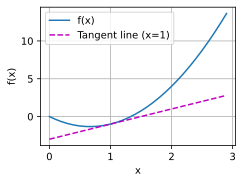

In [ ]:
from IPython import display
from mxnet import np, npx
from d2l import mxnet as d2l
from matplotlib import pyplot as plt   # 可不加，d2l包中有

npx.set_np()
def f(x):
    return 3 * x ** 2 - 4 * x   # 定义二次函数
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h   # 定义导数
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

def use_svg_display():  #@save
    display.set_matplotlib_formats('svg')   # 使⽤svg格式绘图(注释#@save将函数、类或语句保存在d2l包, ⽆需重新定义可直接调⽤)
    
def set_figsize(figsize=(3.5, 2.5)):  #@save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize   # 设置图表⼤⼩

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):   #@save
    axes.set_xlabel(xlabel)   # 设置x轴标签
    axes.set_ylabel(ylabel)   # 设置y轴标签
    axes.set_xscale(xscale)   # 设置x轴大小
    axes.set_yscale(yscale)   # 设置y轴大小
    axes.set_xlim(xlim)   # 设置x轴范围
    axes.set_ylim(ylim)   # 设置y轴范围
    if legend:
        axes.legend(legend)   # 图例
    axes.grid()
    
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', 
         yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):   #@save

    if legend is None:    # 绘制数据点
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    def has_one_axis(X):    # 如果X有⼀个轴，输出True
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])   # 绘制函数f(x)及其x=1处的切线y=2x−3

##### 5. ⾃动求导

In [ ]:
from mxnet import autograd, np, npx

npx.set_np()
x = np.arange(4.0)
x.attach_grad()   # 为⼀个张量的梯度分配内存
x.grad   # 计算梯度后访问它，值被初始化为0

with autograd.record():   # 定义前向传播函数
    y = 2 * np.dot(x, x)   # 计算函数y = 2*x^⊤*x 关于列向量x求导
y.backward()   # ⽤反向传播函数⾃动计算y关于x 每个分量的梯度
x.grad   # 输出梯度

with autograd.record():
    y = x * x   # 
    u = y.detach()   # 切断u分支的反向传播
    z = u * x
z.backward()   # 输出u
y.backward()   # 输出2*x

def f(a):
    b = a * 2
    while np.linalg.norm(b) < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = np.random.normal()   # 从正态（高斯）分布中抽取随机样本
a.attach_grad()   # 为⼀个张量的梯度分配内存
with autograd.record():
    d = f(a)
d.backward()   # 输出d/a，相当于f(a) = k * a

##### 6. 概率
+ 处理多个随机变量：联合概率、条件概率、边际化（反向）、独⽴性

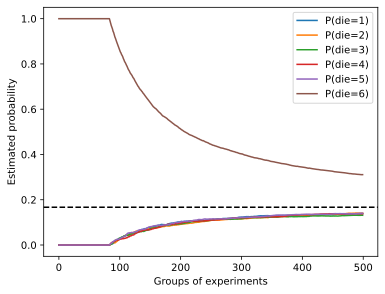

In [ ]:
import random
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()
fair_probs = [1.0 / 6] * 6
counts = np.random.multinomial(10, fair_probs, size=500)   # 掷骰子10次，进行500次实验，在fair_probs不同概率下的次数
p_counts = counts.astype(np.float32) / 500   # astype转化为浮点数, 计算概率
cum_counts = counts.astype(np.float32).cumsum(axis=0)   # 按行计算累加和
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)   # 矩阵按行求和（结果是一维列向量），进行归一化
d2l.set_figsize((6, 4.5))   # 前述定义设置图表⼤⼩
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(), label=("P(die=" + str(i + 1) + ")"))   # 前述定义绘图
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')   # 绘制虚渐近线
d2l.plt.gca().set_xlabel('Groups of experiments')   # 设置x轴标签
d2l.plt.gca().set_ylabel('Estimated probability')   # 设置y轴标签
d2l.plt.legend()   # 绘制曲线

##### 7. 查阅⽂档
+ 通常忽略以 __ 开始和结束的函数（Python 中的特殊对象）或以单个 _ 开始的函数（通常是内部函数）。
+ 根据剩余的函数名或属性名，我们可能会猜测这个模块提供了各种⽣成随机数的⽅法，包括从均匀分布（uniform）、正态分布（normal）和多项分布（multinomial）中采样。

In [ ]:
from mxnet import np

print(dir(np.random))   # 查询随机数⽣成模块中的所有属性
help(np.ones)   # 查看函数用法, 可用 np.ones? 或 np.ones??

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_mx_nd_np', 'beta', 'chisquare', 'choice', 'exponential', 'gamma', 'gumbel', 'logistic', 'lognormal', 'multinomial', 'multivariate_normal', 'normal', 'pareto', 'power', 'rand', 'randint', 'randn', 'rayleigh', 'shuffle', 'uniform', 'weibull']
Help on function ones in module mxnet.numpy:

ones(shape, dtype=<class 'numpy.float32'>, order='C', ctx=None)
    Return a new array of given shape and type, filled with ones.
    This function currently only supports storing multi-dimensional data
    in row-major (C-style).
    
    Parameters
    ----------
    shape : int or tuple of int
        The shape of the empty array.
    dtype : str or numpy.dtype, optional
        An optional value type. Default is `numpy.float32`. Note that this
        behavior is different from NumPy's `ones` function where `float64`
        is the default value, because `float32` is considered as t

### 二、线性神经⽹络

##### 1. 线性回归

4.38586 sec
0.00000 sec


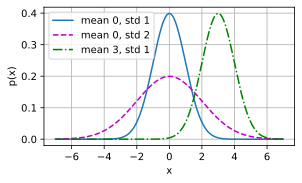

In [ ]:
import math
import time
from mxnet import np
from d2l import mxnet as d2l

class Timer: #@save   # 定义⼀个计时器
    def __init__(self):   # 记录多次运⾏时间
        self.times = []
        self.start()
    def start(self):   # 启动计时器
        self.tik = time.time()
    def stop(self):   # 停⽌计时器并将时间记录在列表中
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    def avg(self):   # 返回平均时间
        return sum(self.times) / len(self.times)
    def sum(self):   # 返回时间总和
        return sum(self.times)
    def cumsum(self):   # 返回累计时间
        return np.array(self.times).cumsum().tolist()
    
n = 10000
a = np.ones(n)
b = np.ones(n)
c = np.zeros(n)
timer = Timer()
timer.start()
for i in range(n):
    c[i] = a[i] + b[i]
print(f'{timer.stop():.5f} sec')   # for循环速度慢
timer.start()
d = a + b
print(f'{timer.stop():.5f} sec')   # ⽮量化加速

def normal(x, mu, sigma):   # 定义正态分布函数
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

x = np.arange(-7, 7, 0.01)   # 再次使⽤numpy进⾏可视化
params = [(0, 1), (0, 2), (3, 1)]   # 均值和标准差对    
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', 
         figsize=(4.5, 2.5), legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])   # 前述定义绘图

##### 2. 线性回归的从零开始实现
+ 生成数据集：正态分布的输入信号+正态分布的噪声→成线性关系
+ 读取数据集：接收批量⼤小、特征矩阵和标签向量作为输⼊，⽣成⼤小为batch_size的小批量，每个小批量包含⼀组特征和标签，在深度学习框架中实现内置迭代器效率更⾼
+ 初始化模型参数：引⼊⾃动微分计算梯度
+ 定义模型：⼴播机制处理向量Xw和标量b
+ 定义损失函数：平⽅损失函数
+ 定义优化算法：小批量随机梯度下降，该函数接受模型参数集合、学习速率和批量⼤小作为输⼊。每⼀步更新的⼤小由学习速率lr决定，因为计算损失是⼀个批量样本的总和，
所以⽤批量⼤小（batch_size）来归⼀化步⻓，这样步⻓⼤小就不会取决于对批量⼤小的选择
+ 训练：使⽤内置迭代器遍历数据集，每⼀轮迭代（epoch）遍历数据集的全部样本，即遍历

features: [0.7250473 2.812099 ] 
label: [-3.9171135]
[[-0.6511809   1.180387  ]
 [ 0.6777117   1.6614839 ]
 [ 0.78485173 -0.06421188]
 [-0.22954404  0.8507714 ]
 [ 0.7974484  -2.2822535 ]
 [ 0.6956263  -0.06284084]
 [-0.38858613  1.7156386 ]
 [ 1.0763495  -0.70007885]
 [ 0.13010561 -1.246872  ]
 [-0.47982094 -1.2594796 ]] 
 [[-1.1072482 ]
 [-0.09653136]
 [ 5.978652  ]
 [ 0.8427631 ]
 [13.565351  ]
 [ 5.7866826 ]
 [-2.4083579 ]
 [ 8.729958  ]
 [ 8.715882  ]
 [ 7.5140395 ]]
epoch = 1, loss = 0.044259
epoch = 2, loss = 0.000174
epoch = 3, loss = 0.000051
epoch = 4, loss = 0.000050
epoch = 5, loss = 0.000050
w的估计误差: [-0.00022888  0.00027609]
b的估计误差: [0.00046873]


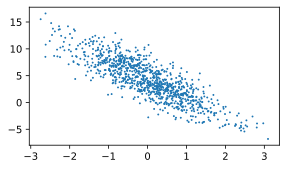

In [ ]:
import random
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()

"""1. ⽣成数据集"""
def synthetic_data(w, b, num_examples): #@save   # ⽣成y=Xw+b噪声
    X = np.random.normal(0, 1, (num_examples, len(w)))   # 生成1000×2正态分布输入信号
    y = np.dot(X, w) + b   # 生成1000×1输出信号
    y += np.random.normal(0, 0.01, y.shape)   # 加入1000×1正态分布噪声
    return X, y.reshape(-1, 1)
true_w = np.array([2, -3.4])   # 定义权重
true_b = 4.2   # 定义偏置
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(), 1)   # 前述定义绘制图像，⽣成第⼆个特征features[:, 1]和labels散点图，成线性关系

"""2. 读取数据集"""
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))   # 生成一维列表
    # random.seed(0)   # 控制随机数种子一致
    random.shuffle(indices)    # 将原列表中的元素打乱顺序
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]   # 依次取出数据
batch_size = 10   # 定义小批量样本数
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)   # 读取数据集并输出
    break   # 只显示一次循环内容

"""3. 初始化模型参数"""
w = np.random.normal(0, 0.01, (2, 1))   # 生成正态分布的2×1权重参数
b = np.zeros(1)   # 生成偏置参数
w.attach_grad()   # 为⼀个张量的梯度分配内存
b.attach_grad()   # 为⼀个张量的梯度分配内存

"""4. 定义模型"""
def linreg(X, w, b): #@save
    return np.dot(X, w) + b   # 计算线性回归模型

"""5. 定义损失函数"""
def squared_loss(y_hat, y): #@save
    return (y_hat - y.reshape(y_hat.shape))**2 / 2   # 均⽅损失

"""6. 定义优化算法"""
def sgd(params, lr, batch_size): #@save
    for param in params:
        param[:] = param - lr * param.grad / batch_size   # ⼩批量随机梯度下降

"""7. 训练"""
lr = 0.03   # 学习率
num_epochs = 5   # 迭代次数
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():   # 定义前向传播的函数
            l = loss(net(X, w, b), y)   # `X`和`y`的⼩批量损失
        l.backward()   # 计算l关于[`w`, `b`]的梯度
        sgd([w, b], lr, batch_size)   # 使⽤参数的梯度更新参数
    train_l = loss(net(features, w, b), labels)   # 计算整体样本损失
    print(f'epoch = {epoch + 1}, loss = {float(train_l.mean()):f}')
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

##### 3. 线性回归的简洁实现
+ 使⽤深度学习框架的⾼级API简洁实现上述的线性回归模型：在 Gluon 中，data 模块提供了数据处理⼯具，nn 模块定义了⼤量的神经⽹络层，loss 模块定义了常⻅的损失函数。在 MXNet 中，initializer 模块提供了各种模型参数初始化⽅法。维度和存储可以⾃动推断，但注意不要在初始化参数之前尝试访问参数
+ 生成数据集：正态分布的输入信号+正态分布的噪声→成线性关系（同前述）
+ 读取数据集：构造⼀个Gluon数据迭代器，调⽤框架中现有的API来读取数据，将 features 和 labels 作为API的参数传递，在实例化数据迭代器对象时指定 batch_size。布尔值 is_train 表⽰是否希望数据迭代器对象在每个迭代周期内打乱数据
+ 定义模型：⾸先定义⼀个模型变量net，它是⼀个 Sequential 类的实例，Sequential 类为串联在⼀起的多个层定义了⼀个容器。当给定输⼊数据，Sequential 实例将数据传⼊到第⼀层，然后将第⼀层的输出作为第⼆层的输⼊，依此类推。所示模型只包含⼀个层，实际上不需要Sequential。在 Gluon 中，全连接层在 Dense 类中定义，由于只有⼀个标量输出，所以将该数字设置为 1。执⾏net(X)时，Gluon会⾃动推断每个层输⼊的形状
+ 初始化模型参数：深度学习框架通常有预定义的⽅法来初始化参数。这⾥指定每个权重参数从均值0、标准差0.01的正态分布中随机采样，偏置参数将初始化为零。Gluon在后端执⾏时，初始化实际上是推迟（deferred）执⾏的，只有在第⼀次尝试通过⽹络传递数据时才会进⾏真正的初始化，因此不需考虑维度
+ 定义损失函数：在 Gluon 中，loss 模块定义了各种损失函数
+ 定义优化算法：小批量随机梯度下降算法是⼀种优化神经⽹络的标准⼯具，Gluon 通过 Trainer 类⽀持该算法的许多变种。实例化 Trainer 时要指定优化的参数（可通过net.collect_params()从模型net中获得）、使⽤优化算法（sgd）以及所需超参数字典。小批量随机梯度下降只需设置learning_rate值
+ 训练：通过调⽤ net(X) ⽣成预测并计算损失 l（正向传播）、通过进⾏反向传播来计算梯度、通过调⽤优化器来更新模型参数

In [ ]:
from mxnet import autograd, gluon, np, npx   # ⽣成数据集
from d2l import mxnet as d2l   # ⽣成数据集
from mxnet.gluon import nn   # 定义模型
from mxnet import init   # 初始化模型参数，提供各种模型参数初始化⽅法
from mxnet import gluon   # 定义优化算法

npx.set_np()

"""1. ⽣成数据集"""
true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)   # 前述定义生成数据集

"""2. 读取数据集"""
def load_array(data_arrays, batch_size, is_train=True): #@save
    dataset = gluon.data.ArrayDataset(*data_arrays)   # 构造⼀个Gluon数据迭代器，在每个迭代周期内打乱数据
    return gluon.data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))   # 返回迭代器的下一个项目，next() 函数要和生成迭代器的iter() 函数一起使用

"""3. 定义模型"""
net = nn.Sequential()   # 当给定输⼊数据，Sequential 实例将数据传⼊到第⼀层，然后将第⼀层的输出作为第⼆层的输⼊，依此类推
net.add(nn.Dense(1))   # 全连接层在 Dense 类中定义，只有⼀个标量输出

"""4. 初始化模型参数"""
net.initialize(init.Normal(sigma=0.01))   # 初始化权重，默认偏置参数初始化为零

"""5. 定义损失函数"""
loss = gluon.loss.L2Loss()   # 使⽤Gluon中的平⽅损失函数(L2Loss)

"""6. 定义优化算法"""
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})   # 小批量随机梯度下降，只需设置learning_rate值

"""7. 训练"""
num_epochs = 5
for epoch in range(num_epochs):
    for X, y in data_iter:
        with autograd.record():   # 定义前向传播的函数
            l = loss(net(X), y)   # `X`和`y`的⼩批量损失
        l.backward()   # 计算l关于[`w`, `b`]的梯度
        trainer.step(batch_size)
    l = loss(net(features), labels)
    print(f'epoch = {epoch + 1}, loss = {l.mean().asnumpy():f}')
w = net[0].weight.data()
print(f'w的估计误差： {true_w - w.reshape(true_w.shape)}')
b = net[0].bias.data()
print(f'b的估计误差： {true_b - b}')

epoch = 1, loss = 0.044912
epoch = 2, loss = 0.000176
epoch = 3, loss = 0.000048
epoch = 4, loss = 0.000047
epoch = 5, loss = 0.000047
w的估计误差： [ 0.00036979 -0.00024629]
b的估计误差： [-0.00022697]


##### 4. 图像分类数据集
+ Fashion-MNIST数据集 [Xiao et al., 2017]

(18, 28, 28, 1)
(32, 1, 64, 64) float32 (32,) int32


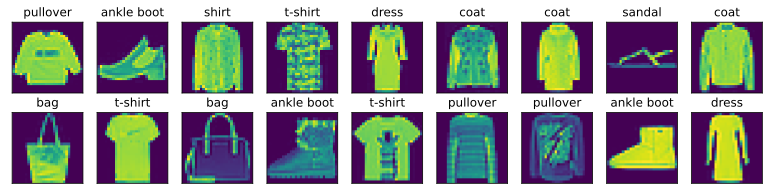

In [ ]:
import sys
from mxnet import gluon
from d2l import mxnet as d2l

d2l.use_svg_display()

"""1. ⽣成数据集"""
mnist_train = gluon.data.vision.FashionMNIST(train=True)   # 通过框架内置函数将 Fashion-MNIST 数据集下载并读取到内存中，训练集6000×10张，像素28×28×1
mnist_test = gluon.data.vision.FashionMNIST(train=False)   # 通过框架内置函数将 Fashion-MNIST 数据集下载并读取到内存中，测试集6000×10张，像素28×28×1

def get_fashion_mnist_labels(labels): #@save
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']   # 定义10个分类标签
    return [text_labels[int(i)] for i in labels]   # 返回Fashion-MNIST数据集的⽂本标签
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): #@save
    figsize = (num_cols * scale, num_rows * scale)   # 绘制图像大小
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)   # 绘制画布
    axes = axes.flatten()   # 将n*m的Axes组展平成1*nm的Axes组，便于绘图
    for i, (ax, img) in enumerate(zip(axes, imgs)):   # enumerate组合为索引序列，列出数据和数据下标，一般用在 for 循环，对应i；zip打包为元组
        ax.imshow(img.asnumpy())   # asnumpy将dataset数据集转换成可迭代的numpy数组
        ax.axes.get_xaxis().set_visible(False)   # 隐藏x坐标轴
        ax.axes.get_yaxis().set_visible(False)   # 隐藏y坐标轴
        if titles:
            ax.set_title(titles[i])   # 设置图片标题
    return axes
X, y = mnist_train[:18]   # 取前18张图
print(X.shape)   # 输出维度18×28×28×1
show_images(X.squeeze(axis=-1), 2, 9, titles=get_fashion_mnist_labels(y))   # squeeze去掉维度为1（通道维度）

"""2. 读取⼩批量"""
batch_size = 256
def get_dataloader_workers(): #@save
    return 0 if sys.platform.startswith('win') else 4   # 在⾮Windows的平台上, 使⽤4个进程来读取的数据
transformer = gluon.data.vision.transforms.ToTensor()   # 通过ToTensor实例将图像从uint8变换成32位浮点数格式，除以255归一化像素值
train_iter = gluon.data.DataLoader(mnist_train.transform_first(transformer), batch_size, 
                                   shuffle=True, num_workers=get_dataloader_workers())   # 使⽤内置的数据迭代器读取数据集
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'   # 计时

"""3. 整合所有组件"""
def load_data_fashion_mnist(batch_size, resize=None): #@save
    dataset = gluon.data.vision   # 下载Fashion-MNIST数据集，然后将其加载到内存中
    trans = [dataset.transforms.ToTensor()]  # 通过ToTensor实例将图像从uint8变换成32位浮点数格式，除以255归一化像素值，HxWxC转换为CxHxW
    if resize:
        trans.insert(0, dataset.transforms.Resize(resize))   # 将图片短边缩放至resize，长宽比保持不变
    trans = dataset.transforms.Compose(trans)   # 串联多个图片变换
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)   # 导入训练集的数据迭代器
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)   # 导入验证集的数据迭代器
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
            gluon.data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=get_dataloader_workers()))   # 返回训练集和验证集的数据迭代器
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

##### 5. softmax回归的从零开始实现

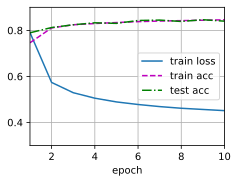

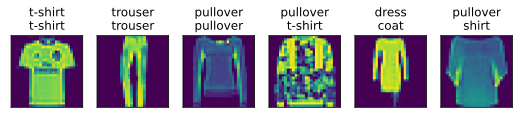

In [ ]:
from IPython import display
from mxnet import autograd, gluon, np, npx
from d2l import mxnet as d2l

npx.set_np()
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)   # 前述整合组件，返回训练集和验证集的数据迭代器

"""1. 初始化模型参数"""
num_inputs = 784   # 28×28图像展平为784×1向量
num_outputs = 10   # 数据集有10个类别，⽹络输出维度10
W = np.random.normal(0, 0.01, (num_inputs, num_outputs))   # 正态分布初始化784×10的权重
b = np.zeros(num_outputs)   # 初始化1×10的偏置为0
W.attach_grad()   # 为⼀个张量的梯度分配内存
b.attach_grad()   # 为⼀个张量的梯度分配内存

"""2. 定义softmax操作"""
def softmax(X):
    X_exp = np.exp(X)   # 根据softmax公式，每个项求幂
    partition = X_exp.sum(1, keepdims=True)   # 每⼀⾏求和，小批量中每个样本是⼀⾏
    return X_exp / partition   # 应⽤⼴播机制

"""3. 定义模型"""
def net(X):
    return softmax(np.dot(X.reshape((-1, W.shape[0])), W) + b)   # reshape函数将每张原始图像展平为向量

"""4. 定义损失函数"""
y = np.array([0, 2])
y_hat = np.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]   # 选择第⼀个样本第⼀个类的概率0.1和第⼆个样本中第三个类的概率0.5
def cross_entropy(y_hat, y):
    return -np.log(y_hat[range(len(y_hat)), y])   # 同上取一样的样本对数值
cross_entropy(y_hat, y)

"""5. 分类准确率"""
def accuracy(y_hat, y):   #@save   # 计算预测正确的数量
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.astype(y.dtype) == y   # dtype返回数据元素类型如int、str、float等, astype强制转换数据类型
    return float(cmp.astype(y.dtype).sum())   # 求和总分类
accuracy(y_hat, y) / len(y)   # 分类准确率=正确预测数量/总预测数量

def evaluate_accuracy(net, data_iter):   #@save   # 计算在指定数据集上模型的精度
    metric = Accumulator(2)   # 创建2个变量，⽤于存储正确预测数量和预测总数量
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.size)
    return metric[0] / metric[1]

class Accumulator:   #@save   # 在n个变量上累加
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]
evaluate_accuracy(net, test_iter)   # ⽤随机权重初始化net模型，准确率接近于随机猜测，如10个类别准确率0.1
        
"""6. 训练"""
def train_epoch_ch3(net, train_iter, loss, updater):   #@save   # 训练模型⼀个迭代周期（定义⻅第3章）
    metric = Accumulator(3)   # 创建3个变量，⽤于存储训练损失总和、训练准确度总和、样本数
    if isinstance(updater, gluon.Trainer):
        updater = updater.step
    for X, y in train_iter:    # 计算梯度并更新参数
        with autograd.record():  # 定义前向传播的函数
            y_hat = net(X)
            l = loss(y_hat, y)   # `X`和`y`的⼩批量损失
        l.backward()   # 计算l关于[`w`, `b`]的梯度
        updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.size)
    return metric[0] / metric[2], metric[1] / metric[2]    # 返回训练损失和训练准确率

class Animator:   #@save   # 在动画中绘制数据
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', 
                 yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1, figsize=(3.5, 2.5)):
        if legend is None:   # 增量地绘制多条线
            legend = []
        d2l.use_svg_display()   # 前述定义绘制d2l图像
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        self.config_axes = lambda: d2l.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)   # 使⽤lambda函数捕获参数
        self.X, self.Y, self.fmts = None, None, fmts
        
    def add(self, x, y):   # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)
        
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):   #@save   # 训练模型(定义⻅第3章)
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9], legend=['train loss', 'train acc', 'test acc'])   # 可视化训练进度
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)   # 返回训练损失和训练准确率
        test_acc = evaluate_accuracy(net, test_iter)   # 计算在指定数据集上模型的准确率
        animator.add(epoch + 1, train_metrics + (test_acc,))   # 存储准确率
    train_loss, train_acc = train_metrics   # 取出训练损失和训练准确率
    assert train_loss < 0.5, train_loss   # assert预先设定程序不满足条件即停止运行，满足则继续运行
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc
    
lr = 0.1   # 设置学习率
def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)   # 前述定义的小批量随机梯度下降优化损失函数
num_epochs = 10   # 迭代周期
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)   # 调用函数训练模型

"""7. 预测"""
def predict_ch3(net, test_iter, n=6):   #@save   # 预测标签分类（定义⻅第3章）
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]   # 标签值
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])   # 绘制图像，实际标签（第⼀⾏）和模型预测（第⼆⾏）
predict_ch3(net, test_iter)

##### 6. softmax回归的简洁实现

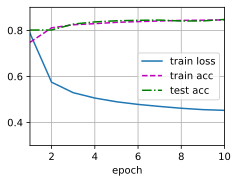

In [ ]:
from mxnet import gluon, init, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()
batch_size = 256   # 批量⼤小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)   # Fashion-MNIST数据集
net = nn.Sequential()   # 初始化模型参数
net.add(nn.Dense(10))   # 带有10个输出的全连接层
net.initialize(init.Normal(sigma=0.01))   # 以均值0和标准差0.01随机初始化权重

loss = gluon.loss.SoftmaxCrossEntropyLoss()   # LogSumExp技巧：没有将softmax概率传递到损失函数中，而是在交叉熵损失函数中传递未归⼀化的预测并同时计算softmax及其对数
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})   # 使⽤学习率为0.1的小批量随机梯度下降作为优化算法

num_epochs = 10   # 迭代周期
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)   # 使用前述定义的训练函数来训练模型

### 三、多层感知机

##### 1、多层感知机

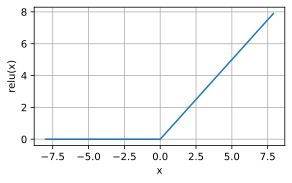

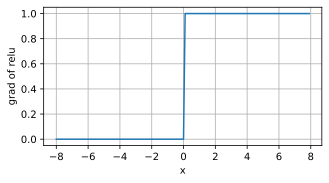

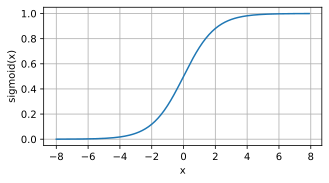

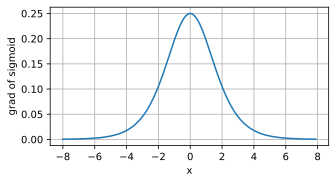

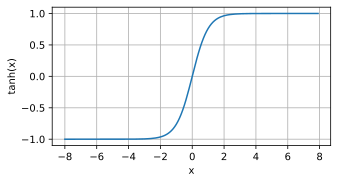

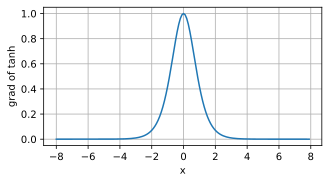

In [ ]:
from mxnet import autograd, np, npx
from d2l import mxnet as d2l
import matplotlib.pyplot as plt 

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件

# ReLU函数
x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()   # 为⼀个张量的梯度分配内存
with autograd.record():   # 定义前向传播的函数
    y = npx.relu(x)
plt.subplots(1,1)
d2l.plot(x, y, 'x', 'relu(x)', figsize=(5, 2.5))   # 绘制ReLU函数
y.backward()   # 计算l关于[`w`, `b`]的梯度
plt.subplots(1,1)
d2l.plot(x, x.grad, 'x', 'grad of relu', figsize=(5, 2.5))   # 绘制ReLU函数的导数

# sigmoid函数
with autograd.record():   # 定义前向传播的函数
    y = npx.sigmoid(x)
plt.subplots(1,1)
d2l.plot(x, y, 'x', 'sigmoid(x)', figsize=(5, 2.5))   # 绘制sigmoid函数
y.backward()
plt.subplots(1,1)
d2l.plot(x, x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))   # 绘制sigmoid函数的导数

# tanh函数
with autograd.record():   # 定义前向传播的函数
    y = np.tanh(x)
plt.subplots(1,1)
d2l.plot(x, y, 'x', 'tanh(x)', figsize=(5, 2.5))   # 绘制tanh函数
y.backward()
plt.subplots(1,1)
d2l.plot(x, x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))   # 绘制tanh函数的导数

##### 2、多层感知机的从零开始实现
+ 使⽤Fashion-MNIST图像分类数据集：28 × 28 = 784个灰度像素值，10个类别
+ 多层感知机：1个隐藏层，256个隐藏单元（超参数）。选择2的幂次⽅作为层宽度，因为内存在硬件中的分配和寻址⽅式可在计算上更⾼效

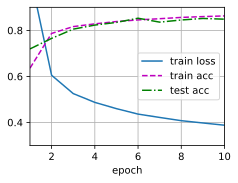

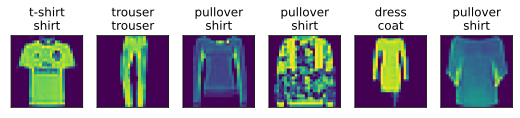

In [ ]:
from mxnet import gluon, np, npx
from d2l import mxnet as d2l

npx.set_np()
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 初始化模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))   # 正态分布初始化输入权重
b1 = np.zeros(num_hiddens)   # 初始化偏置为0
W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_outputs))   # 正态分布初始化输出权重
b2 = np.zeros(num_outputs)   # 初始化偏置为0
params = [W1, b1, W2, b2]
for param in params:
    param.attach_grad()   # 为⼀个张量的梯度分配内存 

# 激活函数
def relu(X):
    return np.maximum(X, 0)   # 使⽤最⼤值函数实现ReLU激活函数（暂不直接调用）

# 模型
def net(X):
    X = X.reshape((-1, num_inputs))   # 将⼆维图像转换为⻓度num_inputs向量
    H = relu(np.dot(X, W1) + b1)   # 隐藏层公式
    return np.dot(H, W2) + b2   # 输出层公式

# 损失函数
loss = gluon.loss.SoftmaxCrossEntropyLoss()

# 训练
num_epochs, lr = 10, 0.1   # 迭代周期、学习率
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, lambda batch_size: d2l.sgd(params, lr, batch_size))   # 训练
d2l.predict_ch3(net, test_iter)   # 进行测试评估模型

##### 3、多层感知机的简洁实现

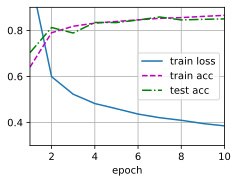

In [1]:
from mxnet import gluon, init, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
net = nn.Sequential()   # 初始化模型参数
net.add(nn.Dense(256, activation='relu'), nn.Dense(10))   # 添加两个全连接层，第一层是隐藏层（256个隐藏单元、ReLU激活函数），第⼆层是输出层（10个输出）
net.initialize(init.Normal(sigma=0.01))   # 以均值0和标准差0.01随机初始化权重

batch_size, lr, num_epochs = 256, 0.1, 10   # 批量⼤小、迭代周期、学习率
loss = gluon.loss.SoftmaxCrossEntropyLoss()   # 损失函数
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})   # 使⽤学习率为0.1的小批量随机梯度下降作为优化算法

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)   # Fashion-MNIST数据集
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)   # 使用前述定义的训练函数来训练模型

##### 4、模型选择、⽋拟合和过拟合
+ 多项式回归：y = 5 + 1.2x − 3.4*x^2/2! + 5.6*x^3/3! + ϵ, where ϵ ∼ N (0, 0.1^2)
+ 噪声项ϵ服从均值为0且标准差为0.1的正态分布, 优化过程希望避免⾮常⼤的梯度值或损失值, 因此使用 x^2/2!而不是 x^2

weight: [[ 5.0005813   1.2883878  -3.4112566   5.1399617  -0.17592709  1.326453
   0.21334516  0.21877524  0.01777747  0.07936046 -0.02378126  0.01623886
  -0.04922469 -0.01172717  0.0144907  -0.06509671 -0.06604658 -0.06648043
   0.06391371 -0.01270983]]


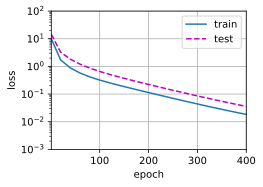

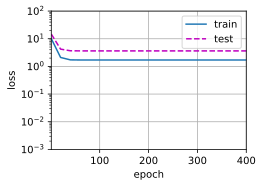

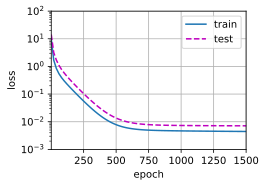

In [2]:
import math
from mxnet import gluon, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

# ⽣成数据集
max_degree = 20   # 多项式的最⼤阶数
n_train, n_test = 100, 100   # 训练和测试数据集⼤⼩
true_w = np.zeros(max_degree)   # 分配⼤量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])   # 多项式系数
features = np.random.normal(size=(n_train + n_test, 1))   # 随机生成正态分布样本
np.random.shuffle(features)   # 改变原来数组的顺序
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))   # power(x,y)计算x的y次方，reshape(1,-1)变成一行，这里生成公式x的幂次方
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)   # gamma(n)=(n-1)!，这里生成公式x的幂次方/阶乘
labels = np.dot(poly_features, true_w)   # 维度(n_train+n_test)
labels += np.random.normal(scale=0.1, size=labels.shape)   # 随机生成正态分布噪声

# 对模型进⾏训练和测试
def evaluate_loss(net, data_iter, loss):   #@save   # 评估给定数据集上模型的损失
    metric = d2l.Accumulator(2)   # 损失的总和, 样本数量
    for X, y in data_iter:
        l = loss(net(X), y)
        metric.add(l.sum(), l.size)
    return metric[0] / metric[1]   # 计算在指定数据集上模型的精度

def train(train_features, test_features, train_labels, test_labels, num_epochs=400):   # 定义训练函数，不设置偏置
    loss = gluon.loss.L2Loss()   # 计算标签和pred的均方误差
    net = nn.Sequential()   # 初始化模型参数
    net.add(nn.Dense(1, use_bias=False))
    net.initialize()   # 使用默认初始化方式
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels), batch_size)   # 构造⼀个Gluon数据迭代器
    test_iter = d2l.load_array((test_features, test_labels), batch_size, is_train=False)   # 构造⼀个Gluon数据迭代器
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})   # 使⽤学习率为0.01的小批量随机梯度下降作为优化算法
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log', xlim=[1, num_epochs], ylim=[1e-3, 1e2], legend=['train', 'test'])   # 可视化训练进度
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)   # 返回训练损失和训练准确率
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss), evaluate_loss(net, test_iter, loss)))   # 存储准确率
    print('weight:', net[0].weight.data().asnumpy())
    
# 三阶多项式函数拟合(正态)
train(poly_features[:n_train, :4], poly_features[n_train:, :4], labels[:n_train], labels[n_train:])   # 从多项式特征中选择前4个维度，即 1, x, x^2/2!, x^3/3!

# 线性函数拟合(⽋拟合)
train(poly_features[:n_train, :2], poly_features[n_train:, :2], labels[:n_train], labels[n_train:])   # 从多项式特征中选择前2个维度，即 1, x

# ⾼阶多项式函数拟合(过拟合)
train(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:], num_epochs=1500)   # 使用所有20阶

##### 5、权重衰减
+ ⾼维线性回归：
+ 标签是关于输⼊的线性函数，同时被均值为0、标准差为0.01的⾼斯噪声破坏。y = 0.05 + ∑(i=1,d) 0.01*xi + ϵ where ϵ ∼ N (0, 0.01^2)
+ 为了使过拟合的效果更加明显，将维数增加到d = 200，并使⽤⼀个只包含20个样本的小训练集。

w的L2范数是： 0.072656594


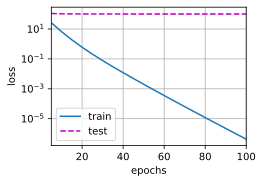

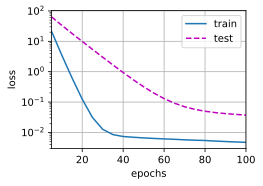

In [12]:
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5   # 训练集大小、测试集大小、输入大小、批量样本数
true_w, true_b = np.ones((num_inputs, 1)) * 0.01, 0.05   # 将输入代入公式
train_data = d2l.synthetic_data(true_w, true_b, n_train)   # ⽣成y=Xw+b噪声
train_iter = d2l.load_array(train_data, batch_size)   # 构造⼀个Gluon数据迭代器
test_data = d2l.synthetic_data(true_w, true_b, n_test)   # ⽣成y=Xw+b噪声
test_iter = d2l.load_array(test_data, batch_size, is_train=False)   # 构造⼀个Gluon数据迭代器

# 初始化模型参数
def init_params():
    w = np.random.normal(scale=1, size=(num_inputs, 1))   # 正态分布初始化200×1的权重
    b = np.zeros(1)   # 初始化1×10的偏置为0
    w.attach_grad()   # 为⼀个张量的梯度分配内存
    b.attach_grad()   # 为⼀个张量的梯度分配内存
    return [w, b]

# 定义L2范数惩罚
def l2_penalty(w):
    return (w**2).sum() / 2    # 所有项求平⽅后求和/2

# 定义训练代码实现
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss   # 前述的线性⽹络和平⽅损失
    num_epochs, lr = 100, 0.003   # 迭代周期、学习率
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])   # 可视化训练进度
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():   # 定义前向传播函数
                l = loss(net(X), y) + lambd * l2_penalty(w)   # 增加L2范数惩罚项，⼴播机制使l2_penalty(w)成为⻓度batch_size向量
            l.backward()   # 计算l关于[w,b]梯度
            d2l.sgd([w, b], lr, batch_size)   # 前述定义的小批量随机梯度下降优化损失函数
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))   # 存储准确率
    print('w的L2范数是：', np.linalg.norm(w))
    
train(lambd=0)   # 不使⽤正则化进⾏训练
train(lambd=5)   # 使⽤权重衰减

+ 简洁实现正则化：
+ 实例化Trainer时直接通过wd指定weight decay超参数，默认Gluon同时衰减权重和偏置
+ 更新模型参数时，超参数wd将乘以wd_mult。因此，如果将wd_mult设置为零，偏置参数b将不会被衰减

w的L2范数： 0.04583231


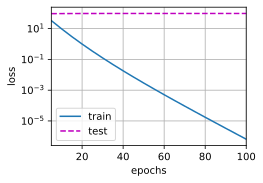

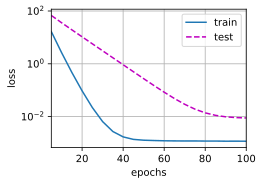

In [13]:
# 简洁实现
def train_concise(wd):
    net = nn.Sequential()   # 初始化模型参数
    net.add(nn.Dense(1))   # 添加1个输出的全连接层
    net.initialize(init.Normal(sigma=1))   # 以均值0和标准差0.01随机初始化权重
    loss = gluon.loss.L2Loss()   # 计算标签和pred的均方误差
    num_epochs, lr = 100, 0.003   # 迭代周期、学习率
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr, 'wd': wd})   # 小批量随机梯度下降优化
    net.collect_params('.*bias').setattr('wd_mult', 0)   # wd_mult=0则偏置参数没有衰减，偏置名称通常以“Bias”结尾
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])   # 可视化训练进度
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():   # 定义前向传播函数
                l = loss(net(X), y)
            l.backward()   # 计算l关于[w,b]梯度
            trainer.step(batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))   # 存储准确率
    print('w的L2范数：', np.linalg.norm(net[0].weight.data()))
    
train_concise(0)   # 不使⽤正则化进⾏训练
train_concise(5)   # 使⽤权重衰减

##### 6、Dropout
+ 以dropout概率丢弃张量输⼊X中的元素，将剩余部分除以1.0-dropout

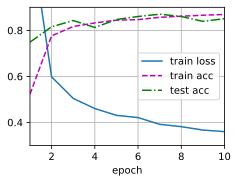

In [14]:
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1   # 先测试确保变量符合规定
    if dropout == 1:
        return np.zeros_like(X)   # 所有元素都被丢弃
    if dropout == 0:
        return X   # 所有元素都被保留
    mask = np.random.uniform(0, 1, X.shape) > dropout   # 取出要保留的元素
    return mask.astype(np.float32) * X / (1.0 - dropout)   # 将剩余部分除以1.0-dropout

# 定义模型参数
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256   # 输入大小、输出大小、第一隐藏层大小、第二隐藏层大小
W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens1))   # 随机生成正态分布权重
b1 = np.zeros(num_hiddens1)   # 偏置参数置0
W2 = np.random.normal(scale=0.01, size=(num_hiddens1, num_hiddens2))   # 随机生成正态分布权重
b2 = np.zeros(num_hiddens2)   # 偏置参数置0
W3 = np.random.normal(scale=0.01, size=(num_hiddens2, num_outputs))   # 随机生成正态分布权重
b3 = np.zeros(num_outputs)   # 偏置参数置0
params = [W1, b1, W2, b2, W3, b3]
for param in params:
    param.attach_grad()   # 为⼀个张量的梯度分配内存 
    
# 定义模型
dropout1, dropout2 = 0.2, 0.5   # 两个隐藏层的丢弃概率
def net(X):
    X = X.reshape(-1, num_inputs)
    H1 = npx.relu(np.dot(X, W1) + b1)   # 使用relu激活函数
    if autograd.is_training():   # 只有在训练模型时才使⽤dropout
        H1 = dropout_layer(H1, dropout1)   # 在第⼀个全连接层之后添加⼀个dropout层
    H2 = npx.relu(np.dot(H1, W2) + b2)   # 使用relu激活函数
    if autograd.is_training():   # 只有在训练模型时才使⽤dropout
        H2 = dropout_layer(H2, dropout2)   # 在第⼆个全连接层之后添加⼀个dropout层
    return np.dot(H2, W3) + b3

# 训练和测试
num_epochs, lr, batch_size = 10, 0.5, 256   # 迭代周期、学习率、批量大小
loss = gluon.loss.SoftmaxCrossEntropyLoss()   # LogSumExp技巧：没有将softmax概率传递到损失函数中，而是在交叉熵损失函数中传递未归⼀化的预测并同时计算softmax及其对数
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)   # 读取Fashion-MNIST数据集，返回训练集和验证集
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, lambda batch_size: d2l.sgd(params, lr, batch_size))   # 前述定义的训练函数

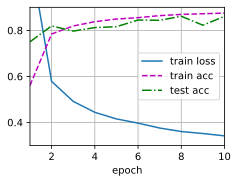

In [15]:
# 简洁实现
net = nn.Sequential()   # 初始化模型参数
net.add(nn.Dense(256, activation="relu"), nn.Dropout(dropout1), nn.Dense(256, activation="relu"),
        nn.Dropout(dropout2), nn.Dense(10))   # 在第⼀个全连接层之后添加⼀个dropout层，在第⼆个全连接层之后添加⼀个dropout层
net.initialize(init.Normal(sigma=0.01))   # 以均值0和标准差0.01随机初始化权重
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})   # 小批量随机梯度下降优化
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)   # 前述定义的训练函数

##### 7、数值稳定性和模型初始化

⼀个矩阵 
 [[ 1.2005802   0.89245564  0.23260607 -2.0926483 ]
 [ 0.23309189  0.28049776 -0.22799385 -1.610721  ]
 [-0.39737567 -0.37906128  1.4266379   0.4028427 ]
 [ 1.0287654  -0.7912941   1.3390195   1.2033544 ]]
乘以100个矩阵后
 [[-8.2470313e+22 -7.8523862e+22  4.3663511e+22 -1.4764817e+22]
 [-3.2906046e+22 -3.1313618e+22  1.7449601e+22 -5.9671704e+21]
 [ 4.5990674e+22  4.3764599e+22 -2.4388868e+22  8.3418059e+21]
 [-6.9001753e+22 -6.5764994e+22  3.6431257e+22 -1.2075056e+22]]


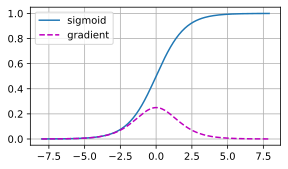

In [16]:
# 梯度消失：sigmoid函数
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
x = np.arange(-8.0, 8.0, 0.1)   # 设置输入
x.attach_grad()   # 为⼀个张量的梯度分配内存
with autograd.record():   # 前向传播的函数
    y = npx.sigmoid(x)   # sigmoid函数
y.backward()   # 计算l关于[w,b]梯度
d2l.plot(x, [y, x.grad], legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))   # 绘制图像

# 梯度爆炸
M = np.random.normal(size=(4, 4))   # 随机生成4×4正态分布矩阵
print('⼀个矩阵 \n', M)
for i in range(100):
    M = np.dot(M, np.random.normal(size=(4, 4)))   # 乘以100个⾼斯随机矩阵后无法收敛
print('乘以100个矩阵后\n', M)

##### 8、实战 Kaggle ⽐赛：预测房价【data文件夹】
+ 数据集：由Bart de Cock于2011年收集[DeCock, 2011]，涵盖2006-2010年亚利桑那州埃姆斯市的房价
+ 1、下载和缓存数据集：
+ 将数据集名称的字符串映射到数据集相关的⼆元组，包含数据集的url和验证⽂件完整性的sha-1密钥。
+ download函数：下载数据集，并缓存在本地⽬录（默认../data）中，返回下载⽂件的名称。如果缓存⽬录中已经存在且其sha-1与存储在DATA_HUB中的相匹配，则使⽤缓存的⽂件，避免重复下载。
+ download_extract函数：下载并解压缩⼀个zip或tar⽂件。
+ download_all函数：将书中使⽤的所有数据集从DATA_HUB下载到缓存⽬录中。
+ 2、访问和读取数据集：
+ 训练数据集（1460×81）包括1460个样本，每个样本80个特征和1个标签，而测试数据（1460×80）包含1459个样本，每个样本80个特征。
+ 3、数据预处理：
+ 取出训练集和测试集（2919×79），删除不必要的ID特征、训练集的房价特征，将其进行归一化、NA数据置0和创建指示符特征；取出训练集的房价作为标签。
+ 处理离散值，⽤⼀次独热编码替换，将多类别标签转换为向量。如“MSZoning”包含值“RL”和“Rm”，将创建两个新的指⽰器特征“MSZoning_RL”和“MSZoning_RM”，其值为0或1。
+ 4、训练：
+ 训练⼀个带有损失平⽅的线性模型作为基线模型，直观知道简单模型离报告最好模型的接近程度。
+ ⽤价格预测的对数来衡量差异，（⽐赛中官⽅⽤来评价提交质量的误差指标），公式见笔记。
+ 训练函数将依赖于Adam优化器，对初始学习率不那么敏感。
+ 对数对于相对误差很有⽤。
+ 5、K折交叉验证
+ 在K折交叉验证中训练K次后，返回训练和验证误差的平均值。
+ 6、模型选择
+ 使⽤K折交叉验证来选择模型并调整超参数。
+ 7、提交Kaggle的预测

正在从http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv下载..\data\kaggle_house_pred_train.csv...
正在从http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv下载..\data\kaggle_house_pred_test.csv...
(1460, 81)
(1459, 80)
   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000
(2919, 79)
      MSSubClass MSZoning  LotFrontage  LotArea  YrSold SaleType SaleCondition
0             60       RL         65.0     8450    2008       WD        Normal
1             20       RL         80.0     9600    2007       WD        Normal
2             60       RL         68.0    11250    2008       WD        Normal
1458          20       RL         68.0     9717    20

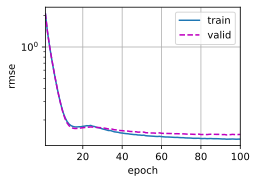

In [17]:
# 1、下载和缓存数据集
import hashlib   # 用于哈希（hash）操作, 将任意长度输入数据映射为固定长度输出数据
import os
import tarfile   # 读写tar归档文件
import zipfile   # 读写zip归档文件
import requests   # 采⽤Apache2 Licensed开源协议的 HTTP 库

#@save
DATA_HUB = dict()   # 将数据集名称的字符串映射到数据集相关的⼆元组，包含数据集的url和验证⽂件完整性的sha-1密钥
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'   # 数据集托管的站点地址

def download(name, cache_dir=os.path.join('..', 'data')):   #@save   # 下载DATA_HUB中的⽂件，返回本地⽂件名
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}."   # 若存在文件则不重复下载
    url, sha1_hash = DATA_HUB[name]   # 存储url和hash值
    os.makedirs(cache_dir, exist_ok=True)   # 创建文件
    fname = os.path.join(cache_dir, url.split('/')[-1])   # 补充具体文件路径名
    if os.path.exists(fname):
        sha1 = hashlib.sha1()   # 验证sha-1密钥
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)   # 读取源文件内容
                if not data:   # 判断文件是否为空
                    break
                sha1.update(data)   # 可分块处理大文件的散列值
        if sha1.hexdigest() == sha1_hash:   # 返回十六进制数据字符串值的密钥进行验证
            return fname   # Hit cache
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)   # 向网站发起请求，并获取响应对象
    with open(fname, 'wb') as f:
        f.write(r.content)   # 写入数据到文件
    return fname

def download_extract(name, folder=None):   #@save   # 下载并解压zip/tar⽂件
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar⽂件可以被解压缩。'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():   #@save   # 下载DATA_HUB中的所有⽂件
    for name in DATA_HUB:
        download(name)
        
        
# 2、访问和读取数据集
import pandas as pd   # 使⽤pandas读⼊并处理数据
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
DATA_HUB['kaggle_house_train'] = (DATA_URL + 'kaggle_house_pred_train.csv', '585e9cc93e70b39160e7921475f9bcd7d31219ce')   #@save   # 导入训练集
DATA_HUB['kaggle_house_test'] = (DATA_URL + 'kaggle_house_pred_test.csv', 'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')   #@save   # 导数测试集合
train_data = pd.read_csv(download('kaggle_house_train'))   # 使⽤pandas加载训练数据的csv⽂件
test_data = pd.read_csv(download('kaggle_house_test'))   # 使⽤pandas加载测试数据的csv⽂件

print(train_data.shape)   # (1460, 81)
print(test_data.shape)   # (1459, 80)
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])   # 查看前四个和最后两个特征，以及前四个样本的标签（含房价）
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))   # 删除不必要的ID特征、训练集的房价特征
print(all_features.shape)   # (2919, 79)删除后的数据维度
print(all_features.iloc[[0, 1, 2, 1458, 1459, 1460, 1461], [0, 1, 2, 3, -3, -2, -1]])   # 查看删除后前四个和最后两个特征，以及前四个样本的标签（不含房价）


# 3、数据预处理
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index   # 取出数据类型（dtypes）不为object的对应列名（index）
all_features[numeric_features] = all_features[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))   # std计算标准差
all_features[numeric_features] = all_features[numeric_features].fillna(0)   # 在标准化数据之后，将缺失值置0
all_features = pd.get_dummies(all_features, dummy_na=True)   # Dummy_na=True将na（缺失值）视为有效的特征值，并创建指⽰符特征
print(all_features.shape)   # (2919, 331)
n_train = train_data.shape[0]   # 1460
train_features = np.array(all_features[:n_train].values, dtype=np.float32)   # 取出处理后的训练集
test_features = np.array(all_features[n_train:].values, dtype=np.float32)   # 取出处理后的测试集
train_labels = np.array(train_data.SalePrice.values.reshape(-1, 1), dtype=np.float32)   # 取出训练集房价作为标签


# 4、训练
loss = gluon.loss.L2Loss()   # 计算标签和pred的均方误差
def get_net():
    net = nn.Sequential()   # 初始化模型参数
    net.add(nn.Dense(1))   # 添加1个输出的全连接层
    net.initialize()   # 默认初始化权重
    return net

def log_rmse(net, features, labels):
    clipped_preds = np.clip(net(features), 1, float('inf'))   # 在取对数时进⼀步稳定该值，将⼩于1的值置1使对数>=0，clip限制数组元素范围
    return np.sqrt(2 * loss(np.log(clipped_preds), np.log(labels)).mean())   # 代入公式（为什么×2？）

def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)   # 构造⼀个Gluon数据迭代器
    trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': learning_rate, 'wd': weight_decay})   # Adam优化算法
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():   # 前向传播的函数
                l = loss(net(X), y)
            l.backward()   # 计算l关于[w,b]梯度
            trainer.step(batch_size)
        train_ls.append(log_rmse(net, train_features, train_labels))   # 计算训练集预测价格的对数与真实标签价格的对数之间的均⽅根误差
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))   # 计算测试集预测价格的对数与真实标签价格的对数之间的均⽅根误差
    return train_ls, test_ls


# 5、K折交叉验证
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k   # 分片后每片尺寸
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)   # 依次取出每个分片的索引
        X_part, y_part = X[idx, :], y[idx]   # 根据索引依次取出每个分片
        if j == i:
            X_valid, y_valid = X_part, y_part   # 刚好均匀分片
        elif X_train is None:
            X_train, y_train = X_part, y_part   # 最后的分片可能为0？
        else:
            X_train = np.concatenate([X_train, X_part], 0)   # 一次完成多个数组拼接
            y_train = np.concatenate([y_train, y_part], 0)   # 一次完成多个数组拼接
    return X_train, y_train, X_valid, y_valid

def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay, batch_size):   # 训练K次返回训练和验证误差的平均值
    train_l_sum, valid_l_sum = 0, 0   # 初始化参数
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)   # 取出分片数据
        net = get_net()   # 初始化网络
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate, weight_decay, batch_size)   # 进行训练
        train_l_sum += train_ls[-1]   # 计算累计均方根误差
        valid_l_sum += valid_ls[-1]   # 计算累计均方根误差
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls], xlabel='epoch', ylabel='rmse', 
                    xlim=[1, num_epochs], legend=['train', 'valid'], yscale='log')   # 绘制图像
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, 'f'valid log rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k   # 返回平均均方根误差


# 6、模型选择
k, num_epochs, lr, weight_decay, batch_size = 8, 100, 25, 0.01, 64   # k折交叉验证次数、迭代周期、学习率、权重衰减因子、批量大小（超参数）
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr, weight_decay, batch_size)   # 使用k折交叉验证训练
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, 'f'平均验证log rmse: {float(valid_l):f}')

In [ ]:
# 7、提交Kaggle的预测
def train_and_pred(train_features, test_features, train_labels, test_data, num_epochs, lr, weight_decay, batch_size):
    net = get_net()   # 初始化网络
    train_ls, _ = train(net, train_features, train_labels, None, None, num_epochs, lr, weight_decay, batch_size)   # 进行训练
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch', ylabel='log rmse', xlim=[1, num_epochs], yscale='log')   # 绘制图像
    print(f'train log rmse {float(train_ls[-1]):f}')
    preds = net(test_features).asnumpy()    # 将⽹络应⽤于测试集
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])   # 将其重新格式化以导出到Kaggle
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)   # 沿着指定的轴将多个dataframe或者series拼接到一起
    submission.to_csv('submission.csv', index=False)   # 输出为csv文件
    
train_and_pred(train_features, test_features, train_labels, test_data, num_epochs, lr, weight_decay, batch_size)   # 提交预测

### 四、深度学习计算

##### 1、层和块
+ （1）多层感知机：简洁实现。
+ （2）⾃定义块：
+ 将输⼊数据作为正向传播函数的参数。
+ 通过正向传播函数来⽣成输出，输出的形状可能与输⼊的形状不同。
+ 计算输出关于输⼊的梯度，可通过反向传播函数进⾏访问。通常这是⾃动发⽣的。
+ 存储和访问正向传播计算所需的参数。
+ 根据需要初始化模型参数。
+ （3）顺序块：
+ 定义将块逐个追加到列表中的函数。
+ 定义正向传播函数，⽤于将输⼊按追加块的顺序传递给块组成的“链条”。
+ _children优点：在块的参数初始化过程中，Gluon知道在_children字典中查找需要初始化参数的⼦块。
+ （4）在正向传播函数中执⾏代码
+ 创建隐藏层的权重参数（c=self.rand_weight），在训练期间不会更新（即为常量参数），即 f(x, w) = c*w^⊤*x
+ （5）混合搭配各种组合块

In [31]:
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件

# 多层感知机
net = nn.Sequential()   # 定义全连接层
net.add(nn.Dense(256, activation='relu'))   # 全连接层包含256个单元和ReLU激活函数的隐藏层
net.add(nn.Dense(10))   # 全连接层包含10个隐藏单元且不带激活函数的输出层
net.initialize()   # 默认初始化权重
X = np.random.uniform(size=(2, 20))   # 从均匀分布中随机采样作为输入
net(X)

array([[-0.00549091, -0.03436874, -0.10215565, -0.00410866,  0.01378894,
        -0.05144126,  0.01450201,  0.0756987 , -0.04014939,  0.01707381],
       [ 0.00901713,  0.03632018, -0.07839255,  0.02666084,  0.04875784,
        -0.00687567, -0.03499876,  0.07097447, -0.06398948, -0.02904918]])

In [32]:
# 自定义块：
class MLP(nn.Block):   # ⽤模型参数声明两个全连接的层
    def __init__(self, **kwargs):
        super().__init__(**kwargs)   # 调⽤MLP的⽗类Block构造函数执⾏初始化
        self.hidden = nn.Dense(256, activation='relu')   # 全连接层包含256个单元和ReLU激活函数的隐藏层
        self.out = nn.Dense(10)   # 全连接层包含10个隐藏单元且不带激活函数的输出层
    def forward(self, X):   # 定义模型的正向传播，根据输⼊X返回输出
        return self.out(self.hidden(X))
net = MLP()   # 准备调用函数
net.initialize()   # 默认初始化权重
net(X)

array([[ 0.08216486,  0.00865366, -0.00108248, -0.02837648,  0.02761863,
        -0.00044686, -0.00061834,  0.0182751 , -0.08464416,  0.02115557],
       [ 0.13493952, -0.00269762,  0.00271637, -0.00738433,  0.03884224,
         0.04990426, -0.02513226,  0.03098216, -0.06162314,  0.03916501]])

In [33]:
# 顺序块：
class MySequential(nn.Block):
    def add(self, block):
        self._children[block.name] = block   # block是Block⼦类的实例，类型是OrderedDict，当MySequential实例调⽤initialize函数时，系统会⾃动初始化_children
    def forward(self, X):
        for block in self._children.values():   # OrderedDict保证按照成员添加顺序遍历
            X = block(X)
        return X
net = MySequential()   # 准备调用函数
net.add(nn.Dense(256, activation='relu'))   # 全连接层包含256个单元和ReLU激活函数的隐藏层
net.add(nn.Dense(10))   # 全连接层包含10个隐藏单元且不带激活函数的输出层
net.initialize()   # 默认初始化权重
net(X)

array([[ 0.01829915, -0.07374447,  0.02869976,  0.08669449, -0.01909767,
        -0.01378654, -0.01045456, -0.02130404,  0.02126184, -0.1315513 ],
       [ 0.01430639, -0.04867027,  0.02053522,  0.07220991,  0.02567327,
        -0.01691825, -0.01194029, -0.02803917,  0.04303537, -0.12938845]])

In [34]:
#  在正向传播函数中执⾏代码
class FixedHiddenMLP(nn.Block):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.rand_weight = self.params.get_constant('rand_weight', np.random.uniform(size=(20, 20)))   # 使⽤get_constant函数创建常量参数self.rand_weight
        self.dense = nn.Dense(20, activation='relu')   # 全连接层包含20个单元和ReLU激活函数的隐藏层
    def forward(self, X):
        X = self.dense(X)
        X = npx.relu(np.dot(X, self.rand_weight.data()) + 1)   # 使⽤创建的常量参数以及relu和dot函数
        X = self.dense(X)   # 复⽤全连接层，相当于两个全连接层共享参数
        while np.abs(X).sum() > 1:   # 控制流: L1范数⼤于1时将输出向量除以2
            X /= 2
        return X.sum()
net = FixedHiddenMLP()   # 准备调用函数
net.initialize()   # 默认初始化权重
net(X)

array(0.8705808)

In [35]:
# 混合搭配各种组合块
class NestMLP(nn.Block):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.net = nn.Sequential()   # 定义全连接层
        self.net.add(nn.Dense(64, activation='relu'), nn.Dense(32, activation='relu'))   # 全连接层包含64、32个单元和ReLU激活函数的隐藏层
        self.dense = nn.Dense(16, activation='relu')   # 全连接层包含16个单元和ReLU激活函数的隐藏层
    def forward(self, X):
        return self.dense(self.net(X))
chimera = nn.Sequential()   # 定义全连接层
chimera.add(NestMLP(), nn.Dense(20), FixedHiddenMLP())   # 组合块调用
chimera.initialize()   # 默认初始化权重
chimera(X)

array(0.56094736)

##### 2、参数管理
+ 默认情况下，MXNet初始化权重参数的⽅法是从均匀分布U(−0.07, 0.07)中随机采样权重，并将偏置参数设置为0。
+ MXNet的init模块提供多种预置初始化⽅法。
+ 要在autograd范围内调整参数，需使⽤set_data，避免误导⾃动微分机制。
+ 参数绑定/共享参数:
+ （1）定义⼀个稠密层，使⽤其参数设置另⼀层参数。
+ （2）不同层参数绑定不仅值相等，且由相同的张量表⽰，改变其中⼀个参数，另⼀个参数也会改变。
+ （3）由于模型参数包含梯度，因此在反向传播期间不同隐藏层的梯度会相加。

In [7]:
# 参数访问
from mxnet import init, np, npx
from mxnet.gluon import nn

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
net = nn.Sequential()   # 定义全连接层
net.add(nn.Dense(8, activation='relu'))   # 全连接层包含8个单元和ReLU激活函数的隐藏层
net.add(nn.Dense(1))   # 全连接层包含1个隐藏单元且不带激活函数的输出层
net.initialize()   # 使⽤默认初始化⽅法
X = np.random.uniform(size=(2, 4))   # 从均匀分布中随机采样作为输入
print(net(X))   # 正向计算

print(net[1].params)   # 通过索引访问第⼆个全连接层的参数
print(type(net[1].bias))   # 从第二层提取偏置
print(net[1].bias)   # 返回参数类实例
print(net[1].bias.data())   # 访问参数值

print(net[1].weight.grad())   # 未调⽤反向传播，参数梯度处于初始0状态
print(net[0].collect_params())   # 访问第⼀个全连接层的参数
print(net.collect_params())   # 访问所有层的参数
net.collect_params()['dense1_bias'].data()   # 访问参数值

[[0.00167425]
 [0.0090128 ]]
dense2_ (
  Parameter dense2_weight (shape=(1, 8), dtype=float32)
  Parameter dense2_bias (shape=(1,), dtype=float32)
)
<class 'mxnet.gluon.parameter.Parameter'>
Parameter dense2_bias (shape=(1,), dtype=float32)
[0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
dense1_ (
  Parameter dense1_weight (shape=(8, 4), dtype=float32)
  Parameter dense1_bias (shape=(8,), dtype=float32)
)
sequential28_ (
  Parameter dense1_weight (shape=(8, 4), dtype=float32)
  Parameter dense1_bias (shape=(8,), dtype=float32)
  Parameter dense2_weight (shape=(1, 8), dtype=float32)
  Parameter dense2_bias (shape=(1,), dtype=float32)
)


array([0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
# 从嵌套块收集参数
def block1():
    net = nn.Sequential()   # 定义全连接层
    net.add(nn.Dense(32, activation='relu'))   # 全连接层包含32个单元和ReLU激活函数的隐藏层
    net.add(nn.Dense(16, activation='relu'))   # 全连接层包含16个单元和ReLU激活函数的隐藏层
    return net
def block2():
    net = nn.Sequential()   # 定义全连接层
    for _ in range(4):
        net.add(block1())   # 嵌套block1()函数
    return net

rgnet = nn.Sequential()   # 定义全连接层
rgnet.add(block2())
rgnet.add(nn.Dense(10))   # 全连接层包含10个隐藏单元且不带激活函数的输出层
rgnet.initialize()   # 使⽤默认初始化⽅法
print(rgnet(X))

print(rgnet.collect_params)   # 访问所有层及参数
print(rgnet.collect_params())   # 访问所有层的参数
print(rgnet[0][1][0].bias.data())   # 访问1块2⼦块1层的偏置项

[[ 3.7013894e-08  2.2540721e-08  5.8743613e-08 -3.5119365e-09
   4.4300666e-08  2.5292490e-08  3.5330633e-08 -7.2137787e-08
   2.5073263e-08 -2.9340036e-08]
 [ 2.6308280e-08  1.6099220e-08  3.4190570e-08 -5.6411649e-09
   2.3831863e-08  2.5988344e-08  2.2420863e-08 -4.8440413e-08
   1.5185098e-08 -1.2908153e-08]]
<bound method Block.collect_params of Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Dense(20 -> 32, Activation(relu))
      (1): Dense(32 -> 16, Activation(relu))
    )
    (1): Sequential(
      (0): Dense(16 -> 32, Activation(relu))
      (1): Dense(32 -> 16, Activation(relu))
    )
    (2): Sequential(
      (0): Dense(16 -> 32, Activation(relu))
      (1): Dense(32 -> 16, Activation(relu))
    )
    (3): Sequential(
      (0): Dense(16 -> 32, Activation(relu))
      (1): Dense(32 -> 16, Activation(relu))
    )
  )
  (1): Dense(16 -> 10, linear)
)>
sequential6_ (
  Parameter dense11_weight (shape=(32, 20), dtype=float32)
  Parameter dense11_bias (shape=(32,

In [5]:
# 参数初始化

# 内置初始化（force_reinit确保参数重新初始化）
net.initialize(init=init.Normal(sigma=0.01), force_reinit=True)   # 初始化为标准差0.01的⾼斯随机变量，偏置参数置0
print(net[0].weight.data()[0])
net.initialize(init=init.Constant(1), force_reinit=True)   # 初始化为常数
print(net[0].weight.data()[0])
net[0].weight.initialize(init=init.Xavier(), force_reinit=True)   # 使⽤Xavier初始化第⼀层
net[1].initialize(init=init.Constant(42), force_reinit=True)   # 第⼆层初始化为常数
print(net[0].weight.data()[0])
print(net[1].weight.data())

# ⾃定义初始化
class MyInit(init.Initializer):
    def _init_weight(self, name, data):   # 接受张量参数data并分配初始化值
        print('Init', name, data.shape)
        data[:] = np.random.uniform(-10, 10, data.shape)   # 从均匀分布中随机采样作为输入，数值范围(-10,10)
        data *= np.abs(data) >= 5   # 定义绝对值要求
net.initialize(MyInit(), force_reinit=True)   # 根据定义函数初始化
print(net[0].weight.data()[:2])

net[0].weight.data()[:] += 1   # 可直接设置参数
net[0].weight.data()[0, 0] = 42   # 可直接设置参数
print(net[0].weight.data()[0])

[ 1.8973684e-02 -6.1128810e-03 -1.2292910e-02  2.5943236e-04
  2.7000505e-04 -5.7406295e-03 -6.2827824e-04 -1.0948895e-02
 -3.2786217e-03  1.2926342e-02 -6.6164900e-03 -5.5699847e-03
 -5.3789923e-03 -1.0154672e-03  1.1744368e-02 -1.3276541e-02
 -1.0310489e-06 -9.1017699e-03 -1.0785142e-02 -2.6410162e-03]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.21844369 -0.4325561  -0.1679925  -0.03166914 -0.1403555   0.17608434
 -0.27774125  0.4088608   0.01845172 -0.06565696  0.23991036 -0.31594938
  0.12039351  0.20465833  0.30385977 -0.23012862  0.45069855  0.34981668
 -0.03802657 -0.28351402]
[[42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42.]]
Init dense8_weight (8, 20)
Init dense7_weight (8, 8)
Init dense10_weight (10, 8)
[[-0.        -0.         

In [4]:
# 参数绑定
net = nn.Sequential()   # 定义全连接层
# 我们需要给共享层⼀个名称，以便可以引⽤它的参数。
shared = nn.Dense(8, activation='relu')   # 全连接层包含8个单元和ReLU激活函数的隐藏层
net.add(nn.Dense(8, activation='relu'), shared, nn.Dense(8, activation='relu', params=shared.params), nn.Dense(10))   # 组合块
net.initialize()   # 默认初始化权重
X = np.random.uniform(size=(2, 20))   # 从均匀分布中随机采样作为输入
net(X)

print(net[1].weight.data()[0] == net[2].weight.data()[0])   # 第二层和第三层参数绑定
net[1].weight.data()[0, 0] = 100
print(net[1].weight.data()[0] == net[2].weight.data()[0])   # 改变其中⼀个参数，另⼀个参数也会改变

[ True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True]


##### 3、延后初始化

In [3]:
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
def get_net():
    net = nn.Sequential()   # 定义全连接层
    net.add(nn.Dense(256, activation='relu'))   # 全连接层包含256个单元和ReLU激活函数的隐藏层
    net.add(nn.Dense(10))   # 全连接层包含10个隐藏单元且不带激活函数的输出层
    return net
net = get_net()   # 调用函数
print(net.collect_params)   # 访问所有层的参数，输入维度未知，框架尚未初始化任何参数，MXNet使⽤特殊值-1表⽰
print(net.collect_params())   # 访问所有层的参数，输入维度未知，框架尚未初始化任何参数，MXNet使⽤特殊值-1表⽰

net.initialize()   # 默认初始化权重
print(net.collect_params())   # 访问所有层的参数，输入维度未知，框架尚未初始化任何参数，MXNet使⽤特殊值-1表⽰
X = np.random.uniform(size=(2, 20))   # 从均匀分布中随机采样作为输入
net(X)
print(net.collect_params())   # 访问所有层的参数，输入维度已知，框架初始化参数

<bound method Block.collect_params of Sequential(
  (0): Dense(-1 -> 256, Activation(relu))
  (1): Dense(-1 -> 10, linear)
)>
sequential4_ (
  Parameter dense5_weight (shape=(256, -1), dtype=float32)
  Parameter dense5_bias (shape=(256,), dtype=float32)
  Parameter dense6_weight (shape=(10, -1), dtype=float32)
  Parameter dense6_bias (shape=(10,), dtype=float32)
)
sequential4_ (
  Parameter dense5_weight (shape=(256, -1), dtype=float32)
  Parameter dense5_bias (shape=(256,), dtype=float32)
  Parameter dense6_weight (shape=(10, -1), dtype=float32)
  Parameter dense6_bias (shape=(10,), dtype=float32)
)
sequential4_ (
  Parameter dense5_weight (shape=(256, 20), dtype=float32)
  Parameter dense5_bias (shape=(256,), dtype=float32)
  Parameter dense6_weight (shape=(10, 256), dtype=float32)
  Parameter dense6_bias (shape=(10,), dtype=float32)
)


##### 4、⾃定义层

In [40]:
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()

# 不带参数的层
class CenteredLayer(nn.Block):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    def forward(self, X):
        return X - X.mean()
layer = CenteredLayer()   # 调用函数
print(layer(np.array([1, 2, 3, 4, 5])))
net = nn.Sequential()   # 定义全连接层
net.add(nn.Dense(128), CenteredLayer())   # 全连接层包含128个隐藏单元且不带激活函数的输出层
net.initialize()   # 默认初始化权重
Y = net(np.random.uniform(size=(4, 8)))   # 从均匀分布中随机采样作为输入
print(Y.mean())   # 均值为0

# 带参数的图层
class MyDense(nn.Block):
    def __init__(self, units, in_units, **kwargs):
        super().__init__(**kwargs)
        self.weight = self.params.get('weight', shape=(in_units, units))   # 定义权重参数
        self.bias = self.params.get('bias', shape=(units,))   # 定义偏置
    def forward(self, x):
        linear = np.dot(x, self.weight.data(ctx=x.ctx)) + self.bias.data(ctx=x.ctx)
        return npx.relu(linear)
dense = MyDense(units=3, in_units=5)
print(dense.params)
dense.initialize()   # 默认初始化权重
print(dense(np.random.uniform(size=(2, 5))))   # 从均匀分布中随机采样作为输入
net = nn.Sequential()   # 定义全连接层
net.add(MyDense(8, in_units=64), MyDense(1, in_units=8))   # 组合块
net.initialize()   # 默认初始化权重
print(net(np.random.uniform(size=(2, 64))))   # 从均匀分布中随机采样作为输入

[-2. -1.  0.  1.  2.]
2.1827873e-10
mydense0_ (
  Parameter mydense0_weight (shape=(5, 3), dtype=<class 'numpy.float32'>)
  Parameter mydense0_bias (shape=(3,), dtype=<class 'numpy.float32'>)
)
[[0.         0.         0.01460012]
 [0.00874032 0.         0.02493969]]
[[0.04726471]
 [0.03755253]]


##### 5、读写⽂件
+ 可以通过参数字典保存和加载⽹络的全部参数。

In [41]:
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()

# 加载和保存张量
x = np.arange(4)
npx.save('x-file', x)   # 写入文件（可为张量、字典等）
x2 = npx.load('x-file')   # 读取文件

# 加载和保存模型参数
class MLP(nn.Block):
    def __init__(self, **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.hidden = nn.Dense(256, activation='relu')   # 全连接层包含256个单元和ReLU激活函数的隐藏层
        self.output = nn.Dense(10)   # 全连接层包含10个隐藏单元且不带激活函数的输出层
    def forward(self, x):
        return self.output(self.hidden(x))
net = MLP()   # 调用函数
net.initialize()   # 默认初始化权重
X = np.random.uniform(size=(2, 20))   # 从均匀分布中随机采样作为输入
Y = net(X)
net.save_parameters('mlp.params')   # 存储模型参数
clone = MLP()
clone.load_parameters('mlp.params')   # 恢利用备份模型参数复模型
Y_clone = clone(X)
Y_clone == Y   # 具有相同模型参数，两个实例计算结果相同

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

##### 6、GPU
+ MXNet张量与NumPy的ndarray⼏乎相同，关键区别之⼀是MXNet⽀持不同的硬件设备。
+ 在MXNet中，每个数组都有⼀个上下⽂（context）。默认所有变量和相关的计算都分配给CPU，有时上下⽂可能是GPU。
+ 在MXNet中，CPU和GPU⽤cpu()和gpu()表⽰。cpu()表⽰所有物理CPU和内存，而gpu()只代表⼀个卡和相应的显存。gpu(0)和gpu()是等价的。
+ 深度学习框架要求计算的所有输⼊数据都在同⼀设备上，⽆论是CPU还是GPU。
+ 不经意移动数据可能会显著降低性能，如计算GPU上每个小批量的损失，在命令⾏报告给⽤⼾（或记录在NumPy ndarray）时，将触发全局解释器锁，使所有GPU阻塞。最好是为GPU内部的⽇志分配内存，并且只移动较⼤的⽇志。

In [42]:
!nvidia-smi   # 查看显卡信息
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()
npx.cpu(), npx.gpu(), npx.gpu(1)
npx.num_gpus()   # 查询可⽤gpu的数量

def try_gpu(i=0):   #@save
    return npx.gpu(i) if npx.num_gpus() >= i + 1 else npx.cpu()   # 存在返回gpu(i)，否则返回cpu()
def try_all_gpus():   #@save
    devices = [npx.gpu(i) for i in range(npx.num_gpus())]    # 返回所有可⽤的GPU，如果没有则返回[cpu()]
    return devices if devices else [npx.cpu()]
try_gpu(), try_gpu(10), try_all_gpus()

x = np.array([1, 2, 3])
x.ctx   # 查询张量所在设备

X = np.ones((2, 3), ctx=try_gpu())   # 在GPU上存储张量
Y = X.copyto(try_gpu(1))   # 多个张量操作时必须在同⼀设备，通过复制移动张量至同一设备
Y.as_in_ctx(try_gpu(1)) is Y   # 多个张量操作时必须在同⼀设备，若变量已存在指定设备则不进⾏任何操作

net = nn.Sequential()   # 定义全连接层
net.add(nn.Dense(1))   # 全连接层包含1个隐藏单元且不带激活函数的输出层
net.initialize(ctx=try_gpu())   # 指定在gpu上初始化权重
net(X)
net[0].weight.data().ctx   # 查询张量所在设备

'nvidia-smi' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


cpu(0)

### 五、卷积神经⽹络

##### 1、图像卷积
+ 输出⼤小等于输⼊⼤小 nh × nw 减去卷积核⼤小 kh × kw：(nh − kh + 1) × (nw − kw + 1)。
+ 图像中⽬标的边缘检测：
+ （1）通过找到像素变化的位置来检测图像中不同颜⾊的边缘。
+ （2）构造6×8⿊⽩图像，中间四列为⿊⾊（0），其余像素为⽩⾊（1）。
+ （3）构造1×2卷积核，进⾏互相关运算时，如果⽔平相邻的两元素相同，则输出为零，否则输出⾮零。
+ （4）输出Y中的1代表从⽩⾊到⿊⾊的边缘，−1代表从⿊⾊到⽩⾊的边缘，其他情况的输出0。
+ （5）将输⼊的⼆维图像转置，再进⾏互相关运算，之前检测到的垂直边缘消失了，说明这个卷积核 K 只可以检测垂直边缘，⽆法检测⽔平边缘。
+ 学习卷积核：
+ （1）构造⼀个卷积层，将卷积核初始化为随机张量。
+ （2）在每次迭代中，⽐较 Y 与卷积层输出的平⽅误差，然后计算梯度来更新卷积核。

In [43]:
from mxnet import autograd, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件

# 互相关运算（卷积运算）
def corr2d(X, K):   #@save
    h, w = K.shape   # 计算⼆维互相关运算
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))   # 代公式计算卷积输出尺寸
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()   # 卷积操作
    return Y
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])   # 输入向量
K = np.array([[0.0, 1.0], [2.0, 3.0]])   # 卷积核
corr2d(X, K)   # 卷积结果

# 随机初始化卷积核权重
class Conv2D(nn.Block):
    def __init__(self, kernel_size, **kwargs):
        super().__init__(**kwargs)
        self.weight = self.params.get('weight', shape=kernel_size)   #  声明权重的模型参数
        self.bias = self.params.get('bias', shape=(1,))   #  声明偏置的模型参数
    def forward(self, x):
        return corr2d(x, self.weight.data()) + self.bias.data()   # 计算权重和偏置卷积
    
# 图像中⽬标的边缘检测
X = np.ones((6, 8))   # 构造6×8⿊⽩图像
X[:, 2:6] = 0   # 边缘突变
K = np.array([[1.0, -1.0]])   # 构造1×2卷积核
Y = corr2d(X, K)   # 进行互相关运算
corr2d(X.T, K)   # 转置后再进行互相关运算

# 学习卷积核（偏置为0不考虑）
conv2d = nn.Conv2D(1, kernel_size=(1, 2), use_bias=False)   # 使用内置函数构造⼆维卷积层，具有1个输出通道和形状为（1，2）的卷积核
conv2d.initialize()   # 默认初始化权重
X = X.reshape(1, 1, 6, 8)   # 四维输⼊和输出格式（批量⼤⼩、通道、⾼度、宽度），前述定义
Y = Y.reshape(1, 1, 6, 7)   # 四维输⼊和输出格式（批量⼤⼩、通道、⾼度、宽度）
for i in range(10):
    with autograd.record():   # 定义前向传播函数
        Y_hat = conv2d(X)   # 卷积运算
        l = (Y_hat - Y)**2   # ⽐较Y与卷积层输出的平⽅误差，然后计算梯度来更新卷积核
    l.backward()   # 计算l关于[w,b]梯度
    conv2d.weight.data()[:] -= 3e-2 * conv2d.weight.grad()   # 迭代卷积核（注意这里的系数已经是最优）
    if (i + 1) % 2 == 0:
        print(f'batch {i+1}, loss {float(l.sum()):.3f}')
conv2d.weight.data().reshape((1, 2))   # 输出卷积核的权重张量

batch 2, loss 5.271
batch 4, loss 0.887
batch 6, loss 0.150
batch 8, loss 0.025
batch 10, loss 0.004


array([[ 0.9863882, -0.9897554]])

##### 2、填充和步幅
+ 加上填充后的输出⼤小: (nh − kh + ph + 1) × (nw − kw + pw + 1)。
+ 加上填充和步幅后的输出⼤小: ⌊(nh − kh + ph + sh)/sh⌋ × ⌊(nw − kw + pw + sw)/sw⌋。
+ 若 ph = kh − 1 和 pw = kw − 1，则输出形状为：⌊(nh + sh − 1)/sh⌋ × ⌊(nw + sw − 1)/sw⌋。
+ 若输⼊的⾼度和宽度可以被垂直和⽔平步幅整除，则输出形状为：(nh/sh) × (nw/sw)。

In [44]:
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件

def comp_conv2d(conv2d, X):   # 此函数初始化卷积层权重，并对输⼊和输出提⾼和缩减相应的维数
    conv2d.initialize()   # 默认初始化权重
    X = X.reshape((1, 1) + X.shape)   # 这⾥的（1，1）表⽰批量⼤⼩和通道数都是1
    Y = conv2d(X)   # 省略前两个维度：批量⼤⼩和通道
    return Y.reshape(Y.shape[2:])

conv2d = nn.Conv2D(1, kernel_size=3, padding=1)   # 卷积核3×3，填充2⾏2列
X = np.random.uniform(size=(8, 8))   # 从均匀分布中随机采样作为输入
comp_conv2d(conv2d, X).shape   # 输出(8, 8)
conv2d = nn.Conv2D(1, kernel_size=(5, 3), padding=(2, 1))   # 卷积核5×3，填充4⾏2列
comp_conv2d(conv2d, X).shape   # 输出(8, 8)
conv2d = nn.Conv2D(1, kernel_size=3, padding=1, strides=2)   # 卷积核3×3，填充2⾏2列，卷积步长2
comp_conv2d(conv2d, X).shape   # 输出(4, 4)
conv2d = nn.Conv2D(1, kernel_size=(3, 5), padding=(0, 1), strides=(3, 4))   # 卷积核3×5，填充0⾏2列，卷积步长3×4
comp_conv2d(conv2d, X).shape   # 输出(2, 2)

(2, 2)

##### 3、多输⼊多输出通道

In [45]:
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件

# 多输入通道
def corr2d_multi_in(X, K):
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))   # 遍历X和K的通道维度并相加
X = np.array([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])   # 输入3×3×2
K = np.array([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])   # 卷积核2×2×2
corr2d_multi_in(X, K)   # 多输入通道卷积运算

# 多输出通道
def corr2d_multi_in_out(X, K):
    return np.stack([corr2d_multi_in(X, k) for k in K], 0)   # 迭代“K”维度，每次都对输⼊“X”执⾏互相关运算，最后将所有结果叠加
K = np.stack((K, K + 1, K + 2), 0)   # 通过+1、+2构造卷积核，并以某一维度进行堆叠，axis=0表示堆叠方向为第0维
K.shape   # (3, 2, 2, 2)，即（输出、输入、卷积核长、卷积核宽）
corr2d_multi_in_out(X, K)   # 多输出通道卷积运算

# 1×1卷积层（使⽤全连接层实现1×1卷积）
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape   # (3, 3, 3)
    c_o = K.shape[0]   # 2
    X = X.reshape((c_i, h * w))   # (3, 9)，即3个全连接层
    K = K.reshape((c_o, c_i))   # (2, 3)
    Y = np.dot(K, X)   # 全连接层中的矩阵乘法(2, 9)
    return Y.reshape((c_o, h, w))   # (2, 3, 3)
X = np.random.normal(0, 1, (3, 3, 3))   # 随机生成正态分布的3×3×3输入
K = np.random.normal(0, 1, (2, 3, 1, 1))   # 随机生成正态分布的2×3×1×1卷积核（输出、输入、卷积核长、卷积核宽）
Y1 = corr2d_multi_in_out_1x1(X, K)   # 1×1卷积层运算
Y2 = corr2d_multi_in_out(X, K)   # 多输出通道卷积运算
assert float(np.abs(Y1 - Y2).sum()) < 1e-6   # 执⾏1×1卷积运算相当于先前实现的多输出通道卷积运算

##### 4、池化层
+ 默认情况下，深度学习框架中的步幅与池化窗口的⼤小相同。

In [46]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件

# 最⼤池化层和平均池化层
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size   # (2, 2)池化窗口大小
    Y = np.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))   # (2, 2)池化次数
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i:i + p_h, j:j + p_w].max()   # 最大池化
            elif mode == 'avg':
                Y[i, j] = X[i:i + p_h, j:j + p_w].mean()   # 平均池化
    return Y
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])   # 输入
pool2d(X, (2, 2))   # 调用函数进行最大池化
pool2d(X, (2, 2), 'avg')   # 调用函数进行平均池化

# 填充和步幅
X = np.arange(16, dtype=np.float32).reshape((1, 1, 4, 4))   # 输入
pool2d = nn.MaxPool2D(3)   # 使⽤3×3池化窗口，默认步幅与池化窗口的⼤小相同
pool2d(X)   # 由于池化层中没有参数，所以不需要调⽤初始化函数
pool2d = nn.MaxPool2D((2, 3), padding=(1, 2), strides=(2, 3))   # 使⽤2×3池化窗口、1×2填充、2×3步幅
pool2d(X)

# 多个通道
X = np.concatenate((X, X + 1), 1)   # 连结张量X和X+1，构建具有2个通道的输⼊
pool2d = nn.MaxPool2D(3, padding=1, strides=2)   # 使⽤3×3池化窗口、1填充、2步幅
pool2d(X)

array([[[[ 5.,  7.],
         [13., 15.]],

        [[ 6.,  8.],
         [14., 16.]]]])

##### 5、卷积神经⽹络（LeNet）
+ 输入1×1×28×28图像 → 6×5×5 Conv，pad=4，s=1，n=(28-5+4)/1+1=28 → 6×28×28图像 → 2×2 Pool，stride=2，n=28/2=14 → 6×14×14图像 → 16×5×5 Conv，pad=0，s=1，n=(14-5+0)/1+1=10 → 16×10×10图像 → 2×2 Pool，stride=2，n=10/2=5 → 16×5×5图像 → 120×1 Dense，权重120×(16×5×5)，偏置120×1 → 84×1 Dense，权重84×120，偏置84×1  → 10×1 Dense，权重10×84，偏置10×1 → 输出10个类别。

loss 0.468, train acc 0.823, test acc 0.825
2725.2 examples/sec on cpu(0)


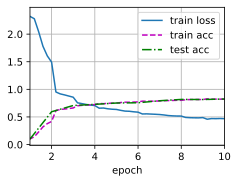

In [47]:
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

# LeNet网络
npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
net = nn.Sequential()   # 定义全连接层
net.add(nn.Conv2D(channels=6, kernel_size=5, padding=2, activation='sigmoid'),   # 6×5×5卷积核、填充2、默认步长1、sigmoid激活函数
        nn.AvgPool2D(pool_size=2, strides=2),   # 2×2平均池化，步长2
        nn.Conv2D(channels=16, kernel_size=5, activation='sigmoid'),   # 16×5×5卷积核、默认填充0、默认步长1、sigmoid激活函数
        nn.AvgPool2D(pool_size=2, strides=2),   # 2×2平均池化，步长2
        nn.Dense(120, activation='sigmoid'),    # 120×1全连接层、sigmoid激活函数
        nn.Dense(84, activation='sigmoid'),   # 84×1全连接层、sigmoid激活函数
        nn.Dense(10))   # 10×1全连接层，默认将（批量⼤⼩，通道数，⾼度，宽度）的输⼊转换为（批量⼤⼩，通道数*⾼度*宽度）的输⼊
X = np.random.uniform(size=(1, 1, 28, 28))   # 从均匀分布中随机采样1×1×28×28作为输入
net.initialize()   # 默认初始化权重
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)   # 输出层及维度

# LeNet应用在Fashion-MNIST数据集
batch_size = 256   # 批量大小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)   # 导入训练集、测试集

def evaluate_accuracy_gpu(net, data_iter, device=None):   #@save   # GPU运算
    if not device:   # 查询第⼀个参数所在的第⼀个设备
        device = list(net.collect_params().values())[0].list_ctx()[0]
    metric = d2l.Accumulator(2)   # 正确预测的数量，总预测的数量
    for X, y in data_iter:
        X, y = X.as_in_ctx(device), y.as_in_ctx(device)
        metric.add(d2l.accuracy(net(X), y), y.size)
    return metric[0] / metric[1]   # 计算在指定数据集上模型的精度

def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):   #@save
    """Train a model with a GPU (defined in Chapter 6)."""
    net.initialize(force_reinit=True, ctx=device, init=init.Xavier())   # 使用Xavier随机初始化模型参数
    loss = gluon.loss.SoftmaxCrossEntropyLoss()   # 使⽤交叉熵损失函数，LogSumExp技巧：没有将softmax概率传递到损失函数中，而是在交叉熵损失函数中传递未归⼀化的预测并同时计算softmax及其对数
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})   # 使⽤学习率为0.9的小批量随机梯度下降作为优化算法
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], legend=['train loss', 'train acc', 'test acc'])   # 可视化窗口
    timer, num_batches = d2l.Timer(), len(train_iter)   # 计时器、训练集大小
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)   # 训练损失之和，训练准确率之和，范例数
        for i, (X, y) in enumerate(train_iter):
            timer.start()   # 启动计时器
            X, y = X.as_in_ctx(device), y.as_in_ctx(device)   # 下⾯是与“d2l.train_epoch_ch3”的主要不同
            with autograd.record():   # 定义前向传播函数
                y_hat = net(X)   # 网络运算
                l = loss(y_hat, y)   # 计算损失函数
            l.backward()   # 计算l关于[w,b]梯度
            trainer.step(X.shape[0])
            metric.add(l.sum(), d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()   # 停止计时器
            train_l = metric[0] / metric[2]   # 计算在指定数据集上模型的精度
            train_acc = metric[1] / metric[2]   # 计算在指定数据集上模型的精度
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches, (train_l, train_acc, None))   # 绘制图像
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))   # 绘制图像
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, 'f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec 'f'on {str(device)}')
    
lr, num_epochs = 0.9, 10   # 学习率、迭代周期
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())   # 训练和评估LeNet-5模型

### 六、现代卷积神经⽹络

##### 1、深度卷积神经⽹络（AlexNet）

In [29]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

# AlexNet网络
npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
net = nn.Sequential()   # 定义全连接层
net.add(nn.Conv2D(96, kernel_size=11, strides=4, activation='relu'),   # 96×11×11卷积核、默认填充0、步长4、relu激活函数
        nn.MaxPool2D(pool_size=3, strides=2),   # 3×3最大池化，步长2
        nn.Conv2D(256, kernel_size=5, padding=2, activation='relu'),   # 256×5×5卷积核、填充2、默认步长1、relu激活函数
        nn.MaxPool2D(pool_size=3, strides=2),   # 3×3最大池化，步长2
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),   # 384×3×3卷积核、填充1、默认步长1、relu激活函数
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),   # 384×3×3卷积核、填充1、默认步长1、relu激活函数
        nn.Conv2D(256, kernel_size=3, padding=1, activation='relu'),   # 256×3×3卷积核、填充1、默认步长1、relu激活函数
        nn.MaxPool2D(pool_size=3, strides=2),   # 3×3最大池化，步长2
        nn.Dense(4096, activation='relu'), nn.Dropout(0.5),    # 4096×1全连接层、relu激活函数，权重衰减因子0.5
        nn.Dense(4096, activation='relu'), nn.Dropout(0.5),    # 4096×1全连接层、relu激活函数，权重衰减因子0.5
        nn.Dense(10))       # 4096×1全连接层、这⾥使⽤Fashion-MNIST，所以类别数为10⽽⾮论⽂的1000
X = np.random.uniform(size=(1, 1, 224, 224))   # 从均匀分布中随机采样1×1×224×224作为输入
net.initialize()   # 默认初始化权重
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)   # 输出层及维度
    
# AlexNet应用在Fashion-MNIST数据集
batch_size = 128   # 批量大小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)   # 导入训练集、测试集，将Fashion-MNIST的图像分辨率28×28像素增加到224×224
lr, num_epochs = 0.01, 10   # 学习率、迭代周期
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())   # 前述定义训练和评估模型

conv164 output shape:	 (1, 96, 54, 54)
pool50 output shape:	 (1, 96, 26, 26)
conv165 output shape:	 (1, 256, 26, 26)
pool51 output shape:	 (1, 256, 12, 12)
conv166 output shape:	 (1, 384, 12, 12)
conv167 output shape:	 (1, 384, 12, 12)
conv168 output shape:	 (1, 256, 12, 12)
pool52 output shape:	 (1, 256, 5, 5)
dense66 output shape:	 (1, 4096)
dropout7 output shape:	 (1, 4096)
dense67 output shape:	 (1, 4096)
dropout8 output shape:	 (1, 4096)
dense68 output shape:	 (1, 10)


##### 2、使⽤块的⽹络（VGG）

In [28]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

# VGG网络
npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
def vgg_block(num_convs, num_channels):
    blk = nn.Sequential()   # 定义全连接层
    for _ in range(num_convs):
        blk.add(nn.Conv2D(num_channels, kernel_size=3, padding=1, activation='relu'))   # 输出通道×3×3卷积核、填充1、默认步长1、relu激活函数
    blk.add(nn.MaxPool2D(pool_size=2, strides=2))   # 2×2最大池化，步长2
    return blk
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))   # 每个VGG块的卷积层个数和输出通道数，VGG-11共使⽤8个卷积层和3个全连接层

def vgg(conv_arch):
    net = nn.Sequential()   # 定义全连接层
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))   # 调用卷积层和池化层
    net.add(nn.Dense(4096, activation='relu'), nn.Dropout(0.5),   # 4096×1全连接层、relu激活函数，权重衰减因子0.5
            nn.Dense(4096, activation='relu'), nn.Dropout(0.5),   # 4096×1全连接层、relu激活函数，权重衰减因子0.5
            nn.Dense(10))   # 4096×1全连接层、这⾥使⽤Fashion-MNIST，所以类别数为10⽽⾮论⽂的1000
    return net
net = vgg(conv_arch)
net.initialize()   # 默认初始化权重
X = np.random.uniform(size=(1, 1, 224, 224))   # 从均匀分布中随机采样1×1×224×224作为输入
for blk in net:
    X = blk(X)
    print(blk.name, 'output shape:\t', X.shape)   # 输出层及维度

# VGG应用在Fashion-MNIST数据集
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)
lr, num_epochs, batch_size = 0.05, 10, 128   # 学习率、迭代周期、批量大小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)   # 导入训练集、测试集，将Fashion-MNIST的图像分辨率28×28像素增加到224×224
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())   # 前述定义训练和评估模型

sequential105 output shape:	 (1, 64, 112, 112)
sequential106 output shape:	 (1, 128, 56, 56)
sequential107 output shape:	 (1, 256, 28, 28)
sequential108 output shape:	 (1, 512, 14, 14)
sequential109 output shape:	 (1, 512, 7, 7)
dense60 output shape:	 (1, 4096)
dropout3 output shape:	 (1, 4096)
dense61 output shape:	 (1, 4096)
dropout4 output shape:	 (1, 4096)
dense62 output shape:	 (1, 10)


##### 3、⽹络中的⽹络（NiN）

In [27]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

# NIN网络
npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
def nin_block(num_channels, kernel_size, strides, padding):
    blk = nn.Sequential()   # 定义全连接层
    blk.add(nn.Conv2D(num_channels, kernel_size, strides, padding, activation='relu'),   # 输出通道×核大小×核大小的卷积核、指定填充、指定步长、relu激活函数
            nn.Conv2D(num_channels, kernel_size=1, activation='relu'),   # 输出通道×1×1卷积核、默认填充0、默认步长1、relu激活函数
            nn.Conv2D(num_channels, kernel_size=1, activation='relu'))   # 输出通道×1×1卷积核、默认填充0、默认步长1、relu激活函数
    return blk
net = nn.Sequential()   # 定义全连接层
net.add(nin_block(96, kernel_size=11, strides=4, padding=0),
        nn.MaxPool2D(pool_size=3, strides=2),   # 3×3最大池化，步长2
        nin_block(256, kernel_size=5, strides=1, padding=2),
        nn.MaxPool2D(pool_size=3, strides=2),   # 3×3最大池化，步长2
        nin_block(384, kernel_size=3, strides=1, padding=1),
        nn.MaxPool2D(pool_size=3, strides=2), nn.Dropout(0.5),   # 3×3最大池化，步长2，权重衰减因子0.5
        nin_block(10, kernel_size=3, strides=1, padding=1),
        nn.GlobalAvgPool2D(),   # 全局平均池化层将窗⼝形状⾃动设置成输⼊的⾼和宽
        nn.Flatten())   # 将四维的输出转成⼆维的输出，其形状为(批量⼤⼩, 10)
X = np.random.uniform(size=(1, 1, 224, 224))   # 从均匀分布中随机采样1×1×224×224作为输入
net.initialize()   # 默认初始化权重
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)   # 输出层及维度
    
# NIN应用在Fashion-MNIST数据集
lr, num_epochs, batch_size = 0.1, 10, 128   # 学习率、迭代周期、批量大小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)   # 导入训练集、测试集，将Fashion-MNIST的图像分辨率28×28像素增加到224×224
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())   # 前述定义训练和评估模型

sequential100 output shape:	 (1, 96, 54, 54)
pool36 output shape:	 (1, 96, 26, 26)
sequential101 output shape:	 (1, 256, 26, 26)
pool37 output shape:	 (1, 256, 12, 12)
sequential102 output shape:	 (1, 384, 12, 12)
pool38 output shape:	 (1, 384, 5, 5)
dropout2 output shape:	 (1, 384, 5, 5)
sequential103 output shape:	 (1, 10, 5, 5)
pool39 output shape:	 (1, 10, 1, 1)
flatten0 output shape:	 (1, 10)


##### 4、含并⾏连结的⽹络（GoogLeNet）

In [26]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

# GoogLeNet网络
npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
class Inception(nn.Block):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)   # Inception系列
        self.p1_1 = nn.Conv2D(c1, kernel_size=1, activation='relu')   # 线路1，输出通道×1×1卷积核、默认填充0、默认步长1、relu激活函数
        self.p2_1 = nn.Conv2D(c2[0], kernel_size=1, activation='relu')   # 线路2，输出通道×1×1卷积核、默认填充0、默认步长1、relu激活函数
        self.p2_2 = nn.Conv2D(c2[1], kernel_size=3, padding=1, activation='relu')   # 线路2，输出通道×3×3卷积核、填充1、默认步长1、relu激活函数
        self.p3_1 = nn.Conv2D(c3[0], kernel_size=1, activation='relu')   # 线路3，输出通道×1×1卷积核、默认填充0、默认步长1、relu激活函数
        self.p3_2 = nn.Conv2D(c3[1], kernel_size=5, padding=2, activation='relu')   # 线路3，输出通道×5×5卷积核、填充2、默认步长1、relu激活函数
        self.p4_1 = nn.MaxPool2D(pool_size=3, strides=1, padding=1)   # 线路4，3×3最大池化，填充1，步长1
        self.p4_2 = nn.Conv2D(c4, kernel_size=1, activation='relu')   # 线路4，输出通道×1×1卷积核、默认填充0、默认步长1、relu激活函数
    def forward(self, x):
        p1 = self.p1_1(x)
        p2 = self.p2_2(self.p2_1(x))
        p3 = self.p3_2(self.p3_1(x))
        p4 = self.p4_2(self.p4_1(x))
        return np.concatenate((p1, p2, p3, p4), axis=1)   # 在通道维度上连结输出（通道数相加）
    
b1 = nn.Sequential()   # 定义全连接层
b1.add(nn.Conv2D(64, kernel_size=7, strides=2, padding=3, activation='relu'),   # 模块1，64×7×7卷积核、填充3、步长2、relu激活函数
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))   # 模块1，3×3最大池化，填充1，步长2

b2 = nn.Sequential()   # 定义全连接层
b2.add(nn.Conv2D(64, kernel_size=1, activation='relu'),   # 模块2，64×1×1卷积核、默认填充0、默认步长1、relu激活函数
       nn.Conv2D(192, kernel_size=3, padding=1, activation='relu'),   # 模块2，192×3×3卷积核、填充1、默认步长1、relu激活函数
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))   # 模块2，3×3最大池化，填充1，步长2

b3 = nn.Sequential()   # 定义全连接层
b3.add(Inception(64, (96, 128), (16, 32), 32),   # 模块3，调用Inception系列
       Inception(128, (128, 192), (32, 96), 64),   # 模块3，调用Inception系列
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))   # 模块3，3×3最大池化，填充1，步长2

b4 = nn.Sequential()   # 定义全连接层
b4.add(Inception(192, (96, 208), (16, 48), 64),   # 模块4，调用Inception系列
       Inception(160, (112, 224), (24, 64), 64),   # 模块4，调用Inception系列
       Inception(128, (128, 256), (24, 64), 64),   # 模块4，调用Inception系列
       Inception(112, (144, 288), (32, 64), 64),   # 模块4，调用Inception系列
       Inception(256, (160, 320), (32, 128), 128),   # 模块4，调用Inception系列
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))   # 模块4，3×3最大池化，填充1，步长2

b5 = nn.Sequential()   # 定义全连接层
b5.add(Inception(256, (160, 320), (32, 128), 128),   # 模块5，调用Inception系列
       Inception(384, (192, 384), (48, 128), 128),    # 模块5，调用Inception系列
       nn.GlobalAvgPool2D())   # 全局平均池化层将窗⼝形状⾃动设置成输⼊的⾼和宽

net = nn.Sequential()   # 定义全连接层
net.add(b1, b2, b3, b4, b5, nn.Dense(10))   #    输出为10的全连接层

X = np.random.uniform(size=(1, 1, 96, 96))   # 从均匀分布中随机采样1×1×96×96作为输入
net.initialize()   # 默认初始化权重
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)   # 输出层及维度
    
# GoogLeNet应用在Fashion-MNIST数据集
lr, num_epochs, batch_size = 0.1, 10, 128   # 学习率、迭代周期、批量大小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)   # 导入训练集、测试集，将Fashion-MNIST的图像分辨率28×28像素增加到96×96
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())   # 前述定义训练和评估AlexNet模型

sequential93 output shape:	 (1, 64, 24, 24)
sequential94 output shape:	 (1, 192, 12, 12)
sequential95 output shape:	 (1, 480, 6, 6)
sequential96 output shape:	 (1, 832, 3, 3)
sequential97 output shape:	 (1, 1024, 1, 1)
dense59 output shape:	 (1, 10)


##### 5、批量归⼀化

In [25]:
from mxnet import autograd, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件

# 从零实现具有张量的批量归⼀化层
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    if not autograd.is_training():    # 判断是训练模式还是预测模式
        X_hat = (X - moving_mean) / np.sqrt(moving_var + eps)    # 预测模式下，直接使⽤传⼊的均值和⽅差
    else:
        assert len(X.shape) in (2, 4)   # 验证维度要求
        if len(X.shape) == 2:
            mean = X.mean(axis=0)   # 使⽤全连接层的情况，计算特征维上的均值
            var = ((X - mean)**2).mean(axis=0)   # 计算⽅差
        else:
            mean = X.mean(axis=(0, 2, 3), keepdims=True)   # 使⽤⼆维卷积层的情况，计算通道维上（axis=1）的均值和⽅差
            var = ((X - mean)**2).mean(axis=(0, 2, 3), keepdims=True)   # 计算⽅差，保持X维度以便后⾯做⼴播运算
        X_hat = (X - mean) / np.sqrt(var + eps)   # 训练模式下，⽤当前的均值和⽅差做标准化
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean   # 更新移动平均的均值和⽅差
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta   # 缩放和移位
    return Y, moving_mean, moving_var

class BatchNorm(nn.Block):
    def __init__(self, num_features, num_dims, **kwargs):   # num_features表示输出通道
        super().__init__(**kwargs)
        if num_dims == 2:   # 2表⽰完全连接层
            shape = (1, num_features)
        else:   # 4表⽰卷积层
            shape = (1, num_features, 1, 1)
        self.gamma = self.params.get('gamma', shape=shape, init=init.One())   # 拉伸参数初始化为1
        self.beta = self.params.get('beta', shape=shape, init=init.Zero())   # 偏移参数初始化为0
        self.moving_mean = np.zeros(shape)   # ⾮模型参数的变量初始化为0
        self.moving_var = np.ones(shape)   # ⾮模型参数的变量初始化为1
    def forward(self, X):
        if self.moving_mean.ctx != X.ctx:
            self.moving_mean = self.moving_mean.copyto(X.ctx)   # 复制到X所在显存上
            self.moving_var = self.moving_var.copyto(X.ctx)   # 复制到X所在显存上
        Y, self.moving_mean, self.moving_var = batch_norm(X, self.gamma.data(), self.beta.data(), self.moving_mean, self.moving_var, eps=1e-12, momentum=0.9)
        return Y
    
# 使⽤批量归⼀化层的LeNet
net = nn.Sequential()   # 定义全连接层
net.add(nn.Conv2D(6, kernel_size=5), BatchNorm(6, num_dims=4), nn.Activation('sigmoid'),    # 6×5×5卷积核、填充2、默认步长1、sigmoid激活函数
        nn.MaxPool2D(pool_size=2, strides=2),   # 2×2最大池化，步长2
        nn.Conv2D(16, kernel_size=5), BatchNorm(16, num_dims=4), nn.Activation('sigmoid'),    # 16×5×5卷积核、默认填充0、默认步长1、sigmoid激活函数
        nn.MaxPool2D(pool_size=2, strides=2),   # 2×2最大池化，步长2
        nn.Dense(120), BatchNorm(120, num_dims=2), nn.Activation('sigmoid'),    # 120×1全连接层、sigmoid激活函数
        nn.Dense(84), BatchNorm(84, num_dims=2), nn.Activation('sigmoid'),    # 84×1全连接层、sigmoid激活函数
        nn.Dense(10))    # 10×1全连接层

# LeNet在Fashion-MNIST数据集训练
lr, num_epochs, batch_size = 1.0, 10, 256   # 学习率、迭代周期、批量大小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)   # 导入训练集、测试集
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())   # 前述定义训练和评估模型
net[1].gamma.data().reshape(-1,)   # 第⼀个批量归⼀化层中的拉伸参数gamma
net[1].beta.data().reshape(-1,)   # 第⼀个批量归⼀化层中的偏移参数beta

In [23]:
# 简明实现
net = nn.Sequential()   # 定义全连接层
net.add(nn.Conv2D(6, kernel_size=5), nn.BatchNorm(), nn.Activation('sigmoid'),   # 6×5×5卷积核、填充2、默认步长1、sigmoid激活函数
        nn.MaxPool2D(pool_size=2, strides=2),   # 2×2最大池化，步长2
        nn.Conv2D(16, kernel_size=5), nn.BatchNorm(), nn.Activation('sigmoid'),   # 16×5×5卷积核、填充2、默认步长1、sigmoid激活函数
        nn.MaxPool2D(pool_size=2, strides=2),   # 2×2最大池化，步长2
        nn.Dense(120), nn.BatchNorm(), nn.Activation('sigmoid'),   # 120×1全连接层、sigmoid激活函数
        nn.Dense(84), nn.BatchNorm(), nn.Activation('sigmoid'),   # 84×1全连接层、sigmoid激活函数
        nn.Dense(10))   # 10×1全连接层
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

##### 6、残差⽹络（ResNet）
+ 代码⽣成两种类型的⽹络：⼀种use_1x1conv=False，应⽤ReLU⾮线性函数前，将输⼊添加到输出；⼀种use_1x1conv=True，添加1×1卷积调整通道和分辨率。

In [21]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

# 残差块
npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
class Residual(nn.Block):   # @save
    def __init__(self, num_channels, use_1x1conv=False, strides=1, **kwargs):
        super().__init__(**kwargs)
        self.conv1 = nn.Conv2D(num_channels, kernel_size=3, padding=1, strides=strides)   # 输出通道×3×3卷积核、填充1、指定步长、无激活函数
        self.conv2 = nn.Conv2D(num_channels, kernel_size=3, padding=1)   # 输出通道×3×3卷积核、填充1、默认步长1、无激活函数
        if use_1x1conv:
            self.conv3 = nn.Conv2D(num_channels, kernel_size=1, strides=strides)   # 输出通道×1×1卷积核、默认填充0、指定步长、无激活函数
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm()   # 每一层进行批量归一化
        self.bn2 = nn.BatchNorm()   # 每一层进行批量归一化
    def forward(self, X):
        Y = npx.relu(self.bn1(self.conv1(X)))   # 使用relu激活函数，嵌套函数
        Y = self.bn2(self.conv2(Y))   # 嵌套函数
        if self.conv3:
            X = self.conv3(X)
        return npx.relu(Y + X)   # 使用relu激活函数
blk = Residual(3)
blk.initialize()   # 默认初始化权重
X = np.random.uniform(size=(4, 3, 6, 6))   # 从均匀分布中随机采样4×3×6×6作为输入
blk(X).shape   # (4, 3, 6, 6)，不使用1×1卷积，通道数不变
blk = Residual(6, use_1x1conv=True, strides=2)
blk.initialize()   # 默认初始化权重
blk(X).shape   # (4, 6, 3, 3)，使用1×1卷积，使两个通道数相同

# ResNet网络
net = nn.Sequential()   # 定义全连接层
net.add(nn.Conv2D(64, kernel_size=7, strides=2, padding=3),    # 64×7×7卷积核、填充3、步长2、无激活函数
        nn.BatchNorm(), nn.Activation('relu'),   # 每一层进行批量归一化、relu激活函数
        nn.MaxPool2D(pool_size=3, strides=2, padding=1))   # 3×3最大池化，填充1，步长2
def resnet_block(num_channels, num_residuals, first_block=False):
    blk = nn.Sequential()   # 定义全连接层
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.add(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.add(Residual(num_channels))
    return blk
net.add(resnet_block(64, 2, first_block=True), resnet_block(128, 2), resnet_block(256, 2), resnet_block(512, 2))   # 调用残差块网络
net.add(nn.GlobalAvgPool2D(), nn.Dense(10))   # 全局平均池化层将窗⼝形状⾃动设置成输⼊的⾼和宽、10×1全连接层
X = np.random.uniform(size=(1, 1, 224, 224))   # 从均匀分布中随机采样1×1×224×224作为输入
net.initialize()   # 默认初始化权重
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)   # 输出层及维度
    
# ResNet在Fashion-MNIST数据集训练
lr, num_epochs, batch_size = 0.05, 10, 256   # 学习率、迭代周期、批量大小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)   # 导入训练集、测试集，将Fashion-MNIST的图像分辨率28×28像素增加到96×96
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())   # 前述定义训练和评估模型

conv51 output shape:	 (1, 64, 112, 112)
batchnorm52 output shape:	 (1, 64, 112, 112)
relu48 output shape:	 (1, 64, 112, 112)
pool12 output shape:	 (1, 64, 56, 56)
sequential85 output shape:	 (1, 64, 56, 56)
sequential86 output shape:	 (1, 128, 28, 28)
sequential87 output shape:	 (1, 256, 14, 14)
sequential88 output shape:	 (1, 512, 7, 7)
pool13 output shape:	 (1, 512, 1, 1)
dense46 output shape:	 (1, 10)


##### 7、稠密连接⽹络（DenseNet）
+ 定义有 2 个输出通道数为 10 的 DenseBlock，使⽤通道数 3 的输⼊时，得到通道数为 3 + 2 × 10 = 23 的输出。

In [6]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件

# 稠密块体
def conv_block(num_channels):
    blk = nn.Sequential()   # 定义全连接层
    blk.add(nn.BatchNorm(), nn.Activation('relu'),   # 每一层进行批量归一化、relu激活函数
            nn.Conv2D(num_channels, kernel_size=3, padding=1))   # 输出通道×3×3卷积核、填充1、默认步长1、无激活函数
    return blk
class DenseBlock(nn.Block):
    def __init__(self, num_convs, num_channels, **kwargs):
        super().__init__(**kwargs)
        self.net = nn.Sequential()   # 定义全连接层
        for _ in range(num_convs):
            self.net.add(conv_block(num_channels))
    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            X = np.concatenate((X, Y), axis=1)   # 连接通道维度上每个块的输⼊和输出
        return X
blk = DenseBlock(2, 10)   # 定义2个输出通道数为10的稠密块体
blk.initialize()   # 默认初始化权重
X = np.random.uniform(size=(4, 3, 8, 8))   # 从均匀分布中随机采样4×3×8×8作为输入
Y = blk(X)
Y.shape   # (4, 23, 8, 8)   # 输出通道数=输入通道数+增长率*稠密块数，如3+2×10=23

# 过渡层
def transition_block(num_channels):
    blk = nn.Sequential()   # 定义全连接层
    blk.add(nn.BatchNorm(), nn.Activation('relu'),   # 每一层进行批量归一化、relu激活函数
            nn.Conv2D(num_channels, kernel_size=1),   # 输出通道×1×1卷积核、默认填充0、默认步长1、无激活函数
            nn.AvgPool2D(pool_size=2, strides=2))   # 2×2平均池化，步长2
    return blk
blk = transition_block(10)   # 使⽤通道数10的过渡层
blk.initialize()   # 默认初始化权重
blk(Y).shape   # (4, 10, 4, 4)

# DenseNet网络
net = nn.Sequential()   # 定义全连接层
net.add(nn.Conv2D(64, kernel_size=7, strides=2, padding=3),   # 64×7×7卷积核、填充3、步长2、无激活函数
        nn.BatchNorm(), nn.Activation('relu'),    # 批量归一化、relu激活函数
        nn.MaxPool2D(pool_size=3, strides=2, padding=1))   # 3×3最大池化，填充1，步长2
num_channels, growth_rate = 64, 32   # 通道数、增长率
num_convs_in_dense_blocks = [4, 4, 4, 4]   # 4个稠密块，每个使用4个卷积层
for i, num_convs in enumerate(num_convs_in_dense_blocks):   # enumerate同时获得索引和值
    print(num_convs, growth_rate,num_channels)
    net.add(DenseBlock(num_convs, growth_rate))
    num_channels += num_convs * growth_rate   # 上⼀个稠密块的输出通道数
    if i != len(num_convs_in_dense_blocks) - 1:   # 在稠密块之间添加⼀个过滤层，使通道数量减半
        num_channels //= 2
        print(num_convs, growth_rate,num_channels)
        net.add(transition_block(num_channels))
net.add(nn.BatchNorm(), nn.Activation('relu'), nn.GlobalAvgPool2D(), nn.Dense(10))   # 批量归一化、relu激活函数、全局平均池化层将窗⼝形状⾃动设置成输⼊的⾼和宽、10×1全连接层
X = np.random.uniform(size=(1, 1, 224, 224))   # 从均匀分布中随机采样1×1×224×224作为输入
net.initialize()   # 默认初始化权重
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)   # 输出层及维度

# DenseNet在Fashion-MNIST数据集训练
lr, num_epochs, batch_size = 0.1, 10, 256   # 学习率、迭代周期、批量大小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)   # 导入训练集、测试集，将Fashion-MNIST的图像分辨率28×28像素增加到96×96
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())   # 前述定义训练和评估模型

4 32 64
4 32 96
4 32 96
4 32 112
4 32 112
4 32 120
4 32 120
conv3 output shape:	 (1, 64, 112, 112)
batchnorm3 output shape:	 (1, 64, 112, 112)
relu3 output shape:	 (1, 64, 112, 112)
pool1 output shape:	 (1, 64, 56, 56)
denseblock1 output shape:	 (1, 192, 56, 56)
sequential10 output shape:	 (1, 96, 28, 28)
denseblock2 output shape:	 (1, 224, 28, 28)
sequential16 output shape:	 (1, 112, 14, 14)
denseblock3 output shape:	 (1, 240, 14, 14)
sequential22 output shape:	 (1, 120, 7, 7)
denseblock4 output shape:	 (1, 248, 7, 7)
batchnorm23 output shape:	 (1, 248, 7, 7)
relu23 output shape:	 (1, 248, 7, 7)
pool5 output shape:	 (1, 248, 1, 1)
dense0 output shape:	 (1, 10)


### 七、循环神经⽹络

##### 1、序列模型
+ 4步预测结果可接受，但超过4步预测的结果⼏乎⽆⽤

epoch 1, loss: 0.029239
epoch 2, loss: 0.025382
epoch 3, loss: 0.024200
epoch 4, loss: 0.024182
epoch 5, loss: 0.024030


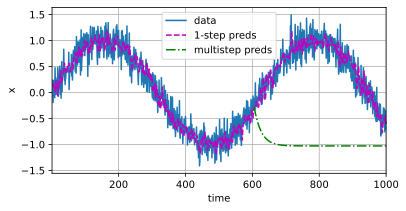

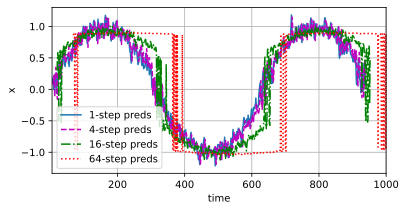

In [18]:
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l
import matplotlib.pyplot as plt 

# 训练
npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
T = 1000   # 产⽣1000个点
time = np.arange(1, T + 1, dtype=np.float32)   # 时间步长1,2,...,1000
x = np.sin(0.01 * time) + np.random.normal(0, 0.2, (T,))   # ⽤正弦函数和正态分布的加性噪声⽣成序列数据
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))   # 绘制图像

tau = 4   # 维度
features = np.zeros((T - tau, tau))   # 缺少tau样本，可丢弃或⽤零填充序列
for i in range(tau):
    features[:, i] = x[i:T - tau + i]   # 将数据映射为yt = xt和xt = [xt−τ,...,xt−1]
labels = x[tau:].reshape((-1, 1))   # 最后一列作为标签
batch_size, n_train = 16, 600   # 小批量尺寸、训练样本数
train_iter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)

def get_net():
    net = nn.Sequential()   # 定义全连接层
    net.add(nn.Dense(10, activation='relu'), nn.Dense(1))   # 10×1全连接层、relu激活函数；1个全连接层，即⼀个多层感知机MLP
    net.initialize(init.Xavier())   # Xavier初始化参数
    return net
loss = gluon.loss.L2Loss()   # 使⽤Gluon中的平⽅损失
def train(net, train_iter, loss, epochs, lr):
    trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': lr})   # 使⽤学习率为0.01的adam算法作为优化算法
    for epoch in range(epochs):
        for X, y in train_iter:
            with autograd.record():   # 定义前向传播函数
                l = loss(net(X), y)   # 计算损失函数
            l.backward()   # 计算l关于[w,b]梯度
            trainer.step(batch_size)
        print(f'epoch {epoch + 1}, 'f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')
net = get_net()
train(net, train_iter, loss, 5, 0.01)

# 预测
onestep_preds = net(features)   # 单步预测
d2l.plot([time, time[tau:]], [x.asnumpy(), onestep_preds.asnumpy()], 'time', 'x', legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(6, 3))   # 绘制图像
multistep_preds = np.zeros(T)
multistep_preds[:n_train + tau] = x[:n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(multistep_preds[i - tau:i].reshape((1, -1)))   # k步预测
d2l.plot([time, time[tau:], time[n_train + tau:]], [x.asnumpy(), onestep_preds.asnumpy(), multistep_preds[n_train + tau:].asnumpy()], 
         'time', 'x', legend=['data', '1-step preds', 'multistep preds'], xlim=[1, 1000], figsize=(6, 3))   # 绘制图像

max_steps = 64
features = np.zeros((T - tau - max_steps + 1, tau + max_steps))
for i in range(tau):
    features[:, i] = x[i:i + T - tau - max_steps + 1]
for i in range(tau, tau + max_steps):
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)
steps = (1, 4, 16, 64)
plt.subplots(1,1)
d2l.plot([time[tau + i - 1:T - max_steps + i] for i in steps], [features[:, (tau + i - 1)].asnumpy() for i in steps], 
         'time', 'x', legend=[f'{i}-step preds'for i in steps], xlim=[5, 1000], figsize=(6, 3))   # 绘制图像

##### 2、文本预处理
+ 从H.G.Well的时光机器中加载⽂本，这是⼀个相当小的语料库，只有30000多个单词，现实中的⽂档集合可能会包含数⼗亿个单词。

In [25]:
import collections
import re
from d2l import mxnet as d2l

# 读取数据集
#@save
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt', '090b5e7e70c295757f55df93cb0a180b9691891a')   # 加载文本
def read_time_machine():   #@save
    with open(d2l.download('time_machine'), 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]   # 读取到⽂本⾏组成的列表中，每⾏是⼀个字符串，忽略标点符号和⼤写
lines = read_time_machine()
print(f'# text lines: {len(lines)}')   # 3221

# 标记化
def tokenize(lines, token='word'):   #@save
    if token == 'word':
        return [line.split() for line in lines]   # 将⽂本⾏拆分为单词标记
    elif token == 'char':
        return [list(line) for line in lines]   # 将⽂本⾏拆分为字符标记
    else:
        print('错误：未知令牌类型：' + token)
tokens = tokenize(lines)   # 每个⽂本序列被拆分成⼀个标记列表，每个标记都是⼀个字符串

# 词汇
class Vocab: #@save
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        counter = count_corpus(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1], reverse=True)   # 按出现频率排序
        self.unk, uniq_tokens = 0, ['<unk>'] + reserved_tokens   # 未知标记的索引为0
        uniq_tokens += [token for token, freq in self.token_freqs if freq >= min_freq and token not in uniq_tokens]
        self.idx_to_token, self.token_to_idx = [], dict()
        for token in uniq_tokens:
            self.idx_to_token.append(token)
            self.token_to_idx[token] = len(self.idx_to_token) - 1
            
    def __len__(self):
        return len(self.idx_to_token)
    
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]
    
    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]
    
def count_corpus(tokens): #@save
    if len(tokens) == 0 or isinstance(tokens[0], list):   # tokens是1D或2D列表
        tokens = [token for line in tokens for token in line]   # 将令牌列表展平
    return collections.Counter(tokens)

vocab = Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])
for i in [0, 10]:
    print('words:', tokens[i])
    print('indices:', vocab[tokens[i]])
    
# 把所有的东西放在⼀起（返回时光机器数据集的令牌索引和词汇表）
def load_corpus_time_machine(max_tokens=-1): #@save
    lines = read_time_machine()
    tokens = tokenize(lines, 'char')
    vocab = Vocab(tokens)
    corpus = [vocab[token] for line in tokens for token in line]   # 每个⽂本⾏不⼀定是⼀个句⼦或段落，所以将所有⽂本⾏展平到⼀个列表中
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus, vocab
corpus, vocab = load_corpus_time_machine()
len(corpus), len(vocab)

# text lines: 3221
[('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('was', 7), ('in', 8), ('that', 9)]
words: ['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
indices: [1, 19, 50, 40, 2183, 2184, 400]
words: ['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']
indices: [2186, 3, 25, 1044, 362, 113, 7, 1421, 3, 1045, 1]


(170580, 28)

##### 3、语⾔模型和数据集

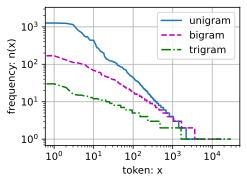

In [30]:
import random
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
tokens = d2l.tokenize(d2l.read_time_machine())
corpus = [token for line in tokens for token in line]   # 一元语法（一个单词）
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10]   # 最常⽤的10个单词

bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]   # 二元语法（两个单词组合）
bigram_vocab = d2l.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

trigram_tokens = [triple for triple in zip(corpus[:-2], corpus[1:-1], corpus[2:])]   # 三元语法（三个单词组合）
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

freqs = [freq for token, freq in vocab.token_freqs]   # 一元语法绘图
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]   # 二元语法绘图
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]   # 三元语法绘图
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x', ylabel='frequency: n(x)', xscale='log', yscale='log', legend=['unigram', 'bigram', 'trigram'])   # 对比三种方式

In [35]:
# 随机采样⽣成⼀⼩批⼦序列
def seq_data_iter_random(corpus, batch_size, num_steps):   #@save   # batch_size每个小批量⼦序列样本数，num_steps每个⼦序列中预定义的时间步数
    corpus = corpus[random.randint(0, num_steps - 1):]   # 从随机偏移量开始对序列进⾏分区
    num_subseqs = (len(corpus) - 1) // num_steps   # 减去1，因为考虑标签
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))    # ⻓度num_steps⼦序列的起始索引
    random.shuffle(initial_indices)    # 在随机抽样中，迭代过程中两个相邻随机⼩批量的⼦序列不⼀定在原始序列上相邻
    def data(pos):
        return corpus[pos:pos + num_steps]   # 返回从pos开始⻓度num_steps的序列
    num_batches = num_subseqs // batch_size
    for i in range(0, batch_size * num_batches, batch_size):
        initial_indices_per_batch = initial_indices[i:i + batch_size]   # initial_indices包含⼦序列的随机起始索引
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield np.array(X), np.array(Y)
my_seq = list(range(35))
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)   # 特征标签⼦序列对⌊(35−1)/5⌋=6，小批量⼤小为2时有3个小批量
    
# 顺序分区⽣成⼀⼩批⼦序列
def seq_data_iter_sequential(corpus, batch_size, num_steps):   #@save
    offset = random.randint(0, num_steps)    # 从随机偏移量开始划分序列
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = np.array(corpus[offset:offset + num_tokens])
    Ys = np.array(corpus[offset + 1:offset + 1 + num_tokens])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)   # 两个相邻小批量的⼦序列在原始序列上相邻
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i:i + num_steps]
        Y = Ys[:, i:i + num_steps]
        yield X, Y
for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)   # 特征标签⼦序列对⌊(35−1)/5⌋=6，小批量⼤小为2时有3个小批量

# 加载序列数据的迭代器
class SeqDataLoader:   #@save
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = d2l.seq_data_iter_random
        else:
            self.data_iter_fn = d2l.seq_data_iter_sequential
        self.corpus, self.vocab = d2l.load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps
    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

def load_data_time_machine(batch_size, num_steps, use_random_iter=False, max_tokens=10000):   #@save
    data_iter = SeqDataLoader(batch_size, num_steps, use_random_iter, max_tokens)   # 返回时光机器数据集的迭代器和词表
    return data_iter, data_iter.vocab

X:  [[23. 24. 25. 26. 27.]
 [ 8.  9. 10. 11. 12.]] 
Y: [[24. 25. 26. 27. 28.]
 [ 9. 10. 11. 12. 13.]]
X:  [[28. 29. 30. 31. 32.]
 [ 3.  4.  5.  6.  7.]] 
Y: [[29. 30. 31. 32. 33.]
 [ 4.  5.  6.  7.  8.]]
X:  [[18. 19. 20. 21. 22.]
 [13. 14. 15. 16. 17.]] 
Y: [[19. 20. 21. 22. 23.]
 [14. 15. 16. 17. 18.]]
X:  [[ 3.  4.  5.  6.  7.]
 [18. 19. 20. 21. 22.]] 
Y: [[ 4.  5.  6.  7.  8.]
 [19. 20. 21. 22. 23.]]
X:  [[ 8.  9. 10. 11. 12.]
 [23. 24. 25. 26. 27.]] 
Y: [[ 9. 10. 11. 12. 13.]
 [24. 25. 26. 27. 28.]]
X:  [[13. 14. 15. 16. 17.]
 [28. 29. 30. 31. 32.]] 
Y: [[14. 15. 16. 17. 18.]
 [29. 30. 31. 32. 33.]]


##### 4、循环神经⽹络

In [39]:
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
X, W_xh = np.random.normal(0, 1, (3, 1)), np.random.normal(0, 1, (1, 4))   # 定义小批量输⼊、权重参数
H, W_hh = np.random.normal(0, 1, (3, 4)), np.random.normal(0, 1, (4, 4))   # 定义前⼀时间步的隐藏变量、权重参数
np.dot(X, W_xh) + np.dot(H, W_hh)   # 隐藏状态计算：XtWxh + Ht−1Whh
np.dot(np.concatenate((X, H), 1), np.concatenate((W_xh, W_hh), 0))   # 隐藏状态计算：Xt和Ht−1连结和Wxh和Whh连结的矩阵乘法，与上述等价

array([[ 1.0752759,  1.5352235,  6.0318894, -2.5148826],
       [ 3.3823447, -3.7327883,  1.878997 ,  4.007305 ],
       [-2.9253204,  2.0760982, -4.6538696, -0.5052216]])

##### 5、循环神经⽹络的从零开始实现

In [55]:
import math
from mxnet import autograd, gluon, np, npx
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件

# 读取数据集
batch_size, num_steps = 32, 35   # 小批量⼦序列样本数、时间步数
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)   # 读取数据集
X = np.arange(10).reshape((2, 5))
npx.one_hot(X.T, 28).shape   # (5, 2, 28)，独热向量，one_hot函数获得维度：时间步数×批量⼤小×词汇表⼤小

# 初始化模型参数
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size   # 输⼊和输出来⾃相同的词表，维度均等于词表⼤小
    def normal(shape):
        return np.random.normal(scale=0.01, size=shape, ctx=device)
    W_xh = normal((num_inputs, num_hiddens))   # 隐藏层参数，输入权重参数
    W_hh = normal((num_hiddens, num_hiddens))   # 隐藏层参数，隐藏层权重参数
    b_h = np.zeros(num_hiddens, ctx=device)   # 隐藏层参数，偏置
    W_hq = normal((num_hiddens, num_outputs))   # 输出层参数，输出权重参数
    b_q = np.zeros(num_outputs, ctx=device)   # 隐藏层参数，偏置
    params = [W_xh, W_hh, b_h, W_hq, b_q]   # 附加梯度
    for param in params:
        param.attach_grad()   # 为⼀个张量的梯度分配内存
    return params

# 循环神经⽹络模型（从零开始实现）
def init_rnn_state(batch_size, num_hiddens, device):
    return (np.zeros((batch_size, num_hiddens), ctx=device),)   # 初始化时返回隐藏状态

def rnn(inputs, state, params):
    W_xh, W_hh, b_h, W_hq, b_q = params   # 输出层维度：时间步数量×批量⼤⼩×词表⼤⼩
    H, = state
    outputs = []
    for X in inputs:    # 输入层维度：批量⼤⼩×词表⼤⼩
        H = np.tanh(np.dot(X, W_xh) + np.dot(H, W_hh) + b_h)   # 代入隐藏层公式
        Y = np.dot(H, W_hq) + b_q   # 代入输出层公式
        outputs.append(Y)
    return np.concatenate(outputs, axis=0), (H,)

class RNNModelScratch: #@save
    def __init__(self, vocab_size, num_hiddens, device, get_params, init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn
    def __call__(self, X, state):
        X = npx.one_hot(X.T, self.vocab_size)
        return self.forward_fn(X, state, self.params)
    def begin_state(self, batch_size, ctx):
        return self.init_state(batch_size, self.num_hiddens, ctx)
    
num_hiddens = 512   # 隐藏单元数，是可调的超参数
net = RNNModelScratch(len(vocab), num_hiddens, d2l.try_gpu(), get_params, init_rnn_state, rnn)
state = net.begin_state(X.shape[0], d2l.try_gpu())
Y, new_state = net(X.as_in_context(d2l.try_gpu()), state)
Y.shape, len(new_state), new_state[0].shape   # ((10, 28), 1, (2, 512))，输出层(时间步数×批量⼤小, 词汇表⼤小)，隐藏状态(批量⼤小, 隐藏单元数)不变

# 预测
def predict_ch8(prefix, num_preds, net, vocab, device):   #@save
    state = net.begin_state(batch_size=1, ctx=device)   # 在prefix后⽣成新字符
    outputs = [vocab[prefix[0]]]
    get_input = lambda: np.array([outputs[-1]], ctx=device).reshape((1, 1))
    for y in prefix[1:]:   # 预热期，模型⾃我更新但不预测，如更新隐藏状态，通常会使隐藏状态比初始值好
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
    for _ in range(num_preds):   # 预测num_preds步
        y, state = net(get_input(), state)
        outputs.append(int(y.argmax(axis=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

predict_ch8('time traveller ', 10, net, vocab, d2l.try_gpu())   # 指定time traveller⽣成10个后续字符

# 梯度裁剪
def grad_clipping(net, theta):   #@save
    if isinstance(net, gluon.Block):
        params = [p.data() for p in net.collect_params().values()]
    else:
        params = net.params
    norm = math.sqrt(sum((p.grad**2).sum() for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm   # 梯度裁剪公式
            
# 训练
def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):  #@save
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)   # 训练损失之和, 标记数量
    for X, Y in train_iter:
        if state is None or use_random_iter:
            state = net.begin_state(batch_size=X.shape[0], ctx=device)   # 第⼀次迭代或使⽤随机抽样时初始化`state`
        else:
            for s in state:
                s.detach()
        y = Y.T.reshape(-1)
        X, y = X.as_in_ctx(device), y.as_in_ctx(device)
        with autograd.record():   # 定义前向传播函数
            y_hat, state = net(X, state)
            l = loss(y_hat, y).mean()
        l.backward()   # 计算l关于[w,b]梯度
        grad_clipping(net, 1)
        updater(batch_size=1)   # 因为已经调⽤了`mean`函数
        metric.add(l * y.size, y.size)
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

def train_ch8(net, train_iter, vocab, lr, num_epochs, device, use_random_iter=False):   #@save
    loss = gluon.loss.SoftmaxCrossEntropyLoss()   # 使⽤⾼级API的内置函数计算softmax和交叉熵损失
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity', legend=['train'], xlim=[10, num_epochs])   # 可视化图像
    if isinstance(net, gluon.Block):
        net.initialize(ctx=device, force_reinit=True, init=init.Normal(0.01))   # 初始化参数
        trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
        updater = lambda batch_size: trainer.step(batch_size)
    else:
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    predict = lambda prefix: predict_ch8(prefix, 50, net, vocab, device)
    for epoch in range(num_epochs):   # 训练和预测
        ppl, speed = train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter)
    if (epoch + 1) % 10 == 0:
        animator.add(epoch + 1, [ppl])
    print(f'困惑度 {ppl:.1f}, {speed:.1f} 标记/秒 {str(device)}')
    print(predict('time traveller'))
    print(predict('traveller'))
num_epochs, lr = 500, 1
train_ch8(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu())
plt.subplots(1,1)
train_ch8(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu(), use_random_iter=True)

##### 6、循环神经⽹络的简洁实现

perplexity 1.2, 26482.4 tokens/sec on cpu(0)
time travellerit would be remarkably convenient for the historia
travelleryou can show black is white beging i will some fre


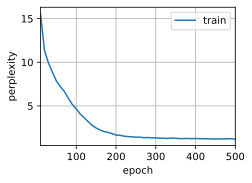

In [51]:
from mxnet import np, npx
from mxnet.gluon import nn, rnn
from d2l import mxnet as d2l

npx.set_np()   # 使⽤张量时调⽤set_np函数兼容MXNet其他张量处理组件
batch_size, num_steps = 32, 35   # 小批量⼦序列样本数、时间步数
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)   # 读取数据集

# 定义循环神经⽹络模型
num_hiddens = 256   # 定义隐藏单元
rnn_layer = rnn.RNN(num_hiddens)   # 构造具有256隐藏单元的单隐藏层的循环神经⽹络层
rnn_layer.initialize()   # 默认初始化权重
state = rnn_layer.begin_state(batch_size=batch_size)
len(state), state[0].shape   # (1, (1, 32, 256))
X = np.random.uniform(size=(num_steps, batch_size, len(vocab)))   # 从均匀分布中随机采样35×32×28作为输入
Y, state_new = rnn_layer(X, state)   # 返回小批量最后时间步更新的隐藏状态
Y.shape, len(state_new), state_new[0].shape # ((35, 32, 256), 1, (1, 32, 256))
class RNNModel(nn.Block):   #@save
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.dense = nn.Dense(vocab_size)
    def forward(self, inputs, state):
        X = npx.one_hot(inputs.T, self.vocab_size)
        Y, state = self.rnn(X, state)   # 全连接层将Y改为维度：时间步数×批量⼤⼩×隐藏单元数
        output = self.dense(Y.reshape(-1, Y.shape[-1]))   # 输出层维度：时间步数×批量⼤⼩×词表⼤⼩
        return output, state
    def begin_state(self, *args, **kwargs):
        return self.rnn.begin_state(*args, **kwargs)
    
# 训练与预测
device = d2l.try_gpu()   # 在gpu上运算
net = RNNModel(rnn_layer, len(vocab))
net.initialize(force_reinit=True, ctx=device)   # 初始化参数
d2l.predict_ch8('time traveller', 10, net, vocab, device)   # 使用具有随机权重的模型预测，结果有误
num_epochs, lr = 500, 1   # 迭代周期、学习率
d2l.train_ch8(net, train_iter, vocab, lr, num_epochs, device)   # 使用⾼级API训练模型